# Analysing Tropospheric Formaldehyde (HCHO) gas in Sri Lanka

This project involves the analysis of Atmospheric Tropospheric Formaldehyde gas in Sri Lanka. Real time data has been extracted from the cities of Colombo, Matara, Nuwara Eliya, Kandy, Monaragala, Kurunegala and Jaffna.
<br>
The aim is to identify trends in the HCHO readings with respect to different geographic, natural and human influenced phenomenons.
<br>
We also aim to predict the possible HCHO readings in the future using Machine Learning algorithms.

# Table of Contents

1. [Data Preprocessing](#data-preprocessing)
2. [Data Visualization](#visualization-of-data)
3. [Spatio-Temporal Analysis](#spatio--temporal-analysis)
4. [Machine Learning](#machine-learning)
5. [Communication and Insights](#communication-and-insights)

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os

directory = "Cleaned Data"

Importing the necessary libraries.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Preprocessing

### Formatting the dataframes.
1. Adding the column names to each data frame. 
2. Changing the location names to a single word.
3. Checking for outliers using plots and handling them.
4. Removing the HCHO readings which are negative.
4. Checking for null values and handling them.

In [4]:
# dropping off the Next_Date column
def drop_next_date(dataframe):
    return dataframe.drop(columns=['Next_Date'], inplace=True)

In [5]:
# function to convert negative values to null values
def negative_val_convertor(df, column):
    df[column] = df[column].apply(lambda x: np.nan if x<0 else x)
    return df

In [6]:
# defining a function to draw the normal distribution plot
def normal_distribution_plot(df, column, color='skyblue'):
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True, stat='density', color=color)
    sns.kdeplot(df[column], color='black', linestyle='-')
    plt.title(f"Normal Distribution Plot for {column} column.")
    plt.xlabel("HCHO Reading")
    plt.ylabel("Density")
    plt.grid(True)
    plt.show()

In [7]:
# defining a function to remove outliers from the data frame
def remove_outliers(df, column):
    # calculating the mean and the standard deviation of the data frame
    mean = df[column].mean()
    std = df[column].std()

    # setting the threshold value for the removal of outliers
    threshold = mean + (3 * std)

    # removing the outliers from the data frame
    df = df[df[column] <= threshold]
    return df

In [8]:
# method to fill the null values with the mean
def imputation(df):
    mean_val = df['HCHO_Reading'].mean()
    df['HCHO_Reading'].fillna(mean_val, inplace=True)
    return df


In [9]:
# method to print the statistical analysis of the HCHO readings
def statistical_analysis(df, column):
    df = globals()[df]

    # calculating the statistical measures
    mean_val = df[column].mean()
    median_val = df[column].median()
    mode_val = df[column].mode()[0]
    std_dev_val = df[column].std()

    return mean_val, median_val, mode_val, std_dev_val

In [10]:
column_names = ['HCHO_Reading', 'Location', 'Current_Date', 'Next_Date'] # specifying the column names to be added to each  dataframe

#### Colombo Matara Nuwara Eliya Data Frame

In [11]:
col_mat_nuw_df = pd.read_csv("Dataset/col_mat_nuw_output.csv", header=None)
col_mat_nuw_df.columns = column_names # adding the column names to the dataframe
col_mat_nuw_df

,HCHO_Reading,Location,Current_Date,Next_Date
0,0.000197,Colombo Proper,2019-01-01,2019-01-02
1,0.000263,Colombo Proper,2019-01-02,2019-01-03
2,0.000099,Colombo Proper,2019-01-03,2019-01-04
3,0.000210,Colombo Proper,2019-01-04,2019-01-05
4,0.000179,Colombo Proper,2019-01-05,2019-01-06
...,...,...,...,...
5473,NaN,Nuwara Eliya Proper,2023-12-27,2023-12-28
5474,NaN,Nuwara Eliya Proper,2023-12-28,2023-12-29
5475,NaN,Nuwara Eliya Proper,2023-12-29,2023-12-30
5476,NaN,Nuwara Eliya Proper,2023-12-30,2023-12-31


In [12]:
# converting the locations into a single word and make it uniform
col_mat_nuw_df.loc[col_mat_nuw_df['Location'] == "Colombo Proper", "Location"] = "Colombo"
col_mat_nuw_df.loc[col_mat_nuw_df['Location'] == "Deniyaya, Matara", "Location"] = "Matara"
col_mat_nuw_df.loc[col_mat_nuw_df['Location'] == "Nuwara Eliya Proper", "Location"] = "Nuwara Eliya"
col_mat_nuw_df

,HCHO_Reading,Location,Current_Date,Next_Date
0,0.000197,Colombo,2019-01-01,2019-01-02
1,0.000263,Colombo,2019-01-02,2019-01-03
2,0.000099,Colombo,2019-01-03,2019-01-04
3,0.000210,Colombo,2019-01-04,2019-01-05
4,0.000179,Colombo,2019-01-05,2019-01-06
...,...,...,...,...
5473,NaN,Nuwara Eliya,2023-12-27,2023-12-28
5474,NaN,Nuwara Eliya,2023-12-28,2023-12-29
5475,NaN,Nuwara Eliya,2023-12-29,2023-12-30
5476,NaN,Nuwara Eliya,2023-12-30,2023-12-31


In [13]:
col_mat_nuw_df.shape # checking the dimensions of the dataframe

(5478, 4)

In [14]:
col_mat_nuw_df.dtypes # checking the datatypes of the dataframe

HCHO_Reading    float64
Location         object
Current_Date     object
Next_Date        object
dtype: object

In [15]:
# changing the data types of the date columns to datetime
col_mat_nuw_df["Current_Date"] = pd.to_datetime(col_mat_nuw_df["Current_Date"])
col_mat_nuw_df["Next_Date"]  = pd.to_datetime(col_mat_nuw_df["Next_Date"])
col_mat_nuw_df.dtypes

HCHO_Reading           float64
Location                object
Current_Date    datetime64[ns]
Next_Date       datetime64[ns]
dtype: object

In [16]:
colombo_df = col_mat_nuw_df[col_mat_nuw_df['Location'] == 'Colombo']
matara_df = col_mat_nuw_df[col_mat_nuw_df['Location'] == 'Matara']
nuwara_eliya_df = col_mat_nuw_df[col_mat_nuw_df['Location'] == 'Nuwara Eliya']

# resetting the indexes of the dataframes
matara_df.reset_index(drop=True, inplace=True)  
nuwara_eliya_df.reset_index(drop=True, inplace=True)

##### Colombo Data Frame

In [17]:
print("Colombo Data Frame")
colombo_df

Colombo Data Frame


,HCHO_Reading,Location,Current_Date,Next_Date
0,0.000197,Colombo,2019-01-01,2019-01-02
1,0.000263,Colombo,2019-01-02,2019-01-03
2,0.000099,Colombo,2019-01-03,2019-01-04
3,0.000210,Colombo,2019-01-04,2019-01-05
4,0.000179,Colombo,2019-01-05,2019-01-06
...,...,...,...,...
1821,0.000118,Colombo,2023-12-27,2023-12-28
1822,NaN,Colombo,2023-12-28,2023-12-29
1823,NaN,Colombo,2023-12-29,2023-12-30
1824,0.000140,Colombo,2023-12-30,2023-12-31


In [18]:
drop_next_date(colombo_df)

In [19]:
colombo_df.dtypes

HCHO_Reading           float64
Location                object
Current_Date    datetime64[ns]
dtype: object

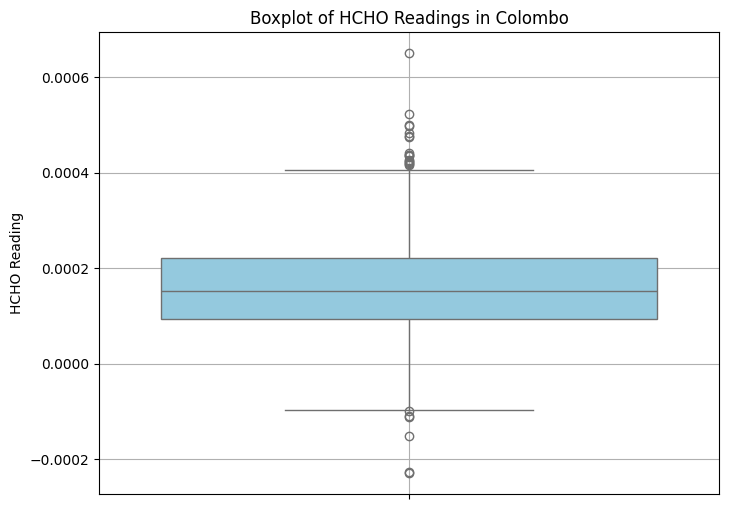

In [20]:
# drawing a box plot to see for outliers
plt.figure(figsize=(8,6))
sns.boxplot(data=colombo_df, y='HCHO_Reading', color='skyblue')
plt.title("Boxplot of HCHO Readings in Colombo")
plt.ylabel("HCHO Reading")
plt.grid(True)
plt.show()

In [21]:
colombo_df = negative_val_convertor(colombo_df, 'HCHO_Reading') # converting negative to null values
colombo_df

,HCHO_Reading,Location,Current_Date
0,0.000197,Colombo,2019-01-01
1,0.000263,Colombo,2019-01-02
2,0.000099,Colombo,2019-01-03
3,0.000210,Colombo,2019-01-04
4,0.000179,Colombo,2019-01-05
...,...,...,...
1821,0.000118,Colombo,2023-12-27
1822,NaN,Colombo,2023-12-28
1823,NaN,Colombo,2023-12-29
1824,0.000140,Colombo,2023-12-30


In [22]:
colombo_df.isnull().sum() # checking for null values

HCHO_Reading    539
Location          0
Current_Date      0
dtype: int64

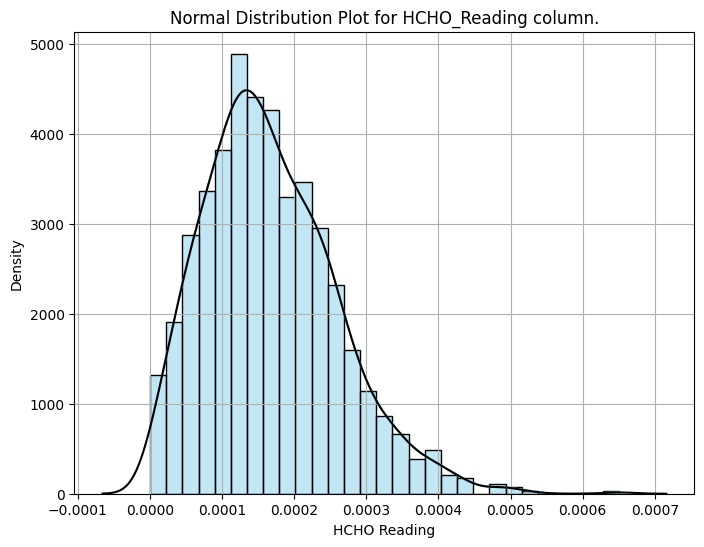

In [23]:
normal_distribution_plot(colombo_df, 'HCHO_Reading', color='skyblue') # plotting the normal distribution 

In [24]:
colombo_df = remove_outliers(colombo_df, 'HCHO_Reading') # removing outliers from the dataframe
colombo_df.reset_index(drop=True, inplace=True) # resetting the index of the dataframe
colombo_df

,HCHO_Reading,Location,Current_Date
0,0.000197,Colombo,2019-01-01
1,0.000263,Colombo,2019-01-02
2,0.000099,Colombo,2019-01-03
3,0.000210,Colombo,2019-01-04
4,0.000179,Colombo,2019-01-05
...,...,...,...
1275,0.000182,Colombo,2023-12-24
1276,0.000343,Colombo,2023-12-25
1277,0.000118,Colombo,2023-12-27
1278,0.000140,Colombo,2023-12-30


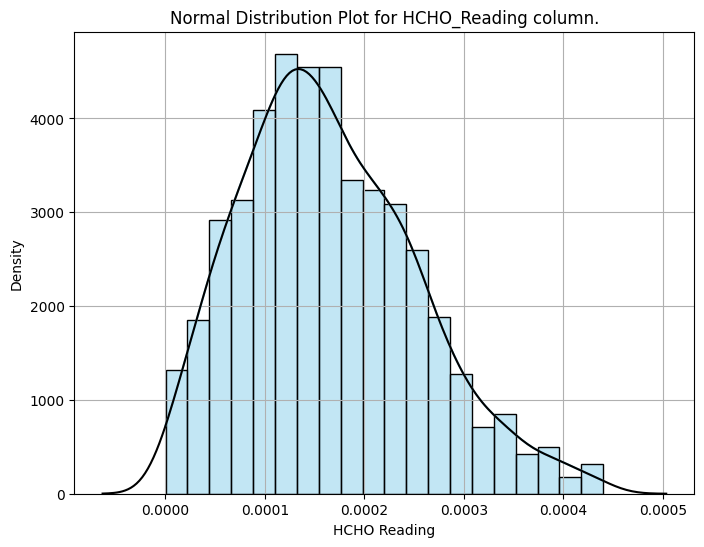

In [25]:
normal_distribution_plot(colombo_df, 'HCHO_Reading', color='skyblue') # plotting the normal distribution

In [26]:
colombo_df = imputation(colombo_df) # imputing the null values with the mean
colombo_df

,HCHO_Reading,Location,Current_Date
0,0.000197,Colombo,2019-01-01
1,0.000263,Colombo,2019-01-02
2,0.000099,Colombo,2019-01-03
3,0.000210,Colombo,2019-01-04
4,0.000179,Colombo,2019-01-05
...,...,...,...
1275,0.000182,Colombo,2023-12-24
1276,0.000343,Colombo,2023-12-25
1277,0.000118,Colombo,2023-12-27
1278,0.000140,Colombo,2023-12-30


In [27]:
colombo_df.isnull().sum() # checking for null values

HCHO_Reading    0
Location        0
Current_Date    0
dtype: int64

In [28]:
colombo_mean, colombo_median, colombo_mode, colombo_std_dev = statistical_analysis('colombo_df', 'HCHO_Reading') # statistical analysis of the HCHO readings
print("Statistical Analysis of HCHO Readings in Colombo")
print(f"Mean Value: {colombo_mean}")
print(f"Median Value: {colombo_median}")
print(f"Mode Value: {colombo_mode}")
print(f"Standard Deviation Value: {colombo_std_dev}")

Statistical Analysis of HCHO Readings in Colombo
Mean Value: 0.00016487971079346629
Median Value: 0.00015511855244360002
Mode Value: 2.111934367094221e-07
Standard Deviation Value: 8.822259052873074e-05


In [29]:
# colombo_df.to_csv("colombo_df.csv", index=False)
if not os.path.exists(directory):
    os.makedirs(directory)

colombo_df.to_csv('Cleaned Data/colombo_df.csv', index=False)

##### Matara Data Frame

In [30]:
print("Matara Data Frame")
matara_df

Matara Data Frame


,HCHO_Reading,Location,Current_Date,Next_Date
0,NaN,Matara,2019-01-01,2019-01-02
1,0.000006,Matara,2019-01-02,2019-01-03
2,0.000236,Matara,2019-01-03,2019-01-04
3,0.000064,Matara,2019-01-04,2019-01-05
4,0.000053,Matara,2019-01-05,2019-01-06
...,...,...,...,...
1821,0.000228,Matara,2023-12-27,2023-12-28
1822,NaN,Matara,2023-12-28,2023-12-29
1823,NaN,Matara,2023-12-29,2023-12-30
1824,0.000116,Matara,2023-12-30,2023-12-31


In [31]:
drop_next_date(matara_df)

In [32]:
matara_df.dtypes

HCHO_Reading           float64
Location                object
Current_Date    datetime64[ns]
dtype: object

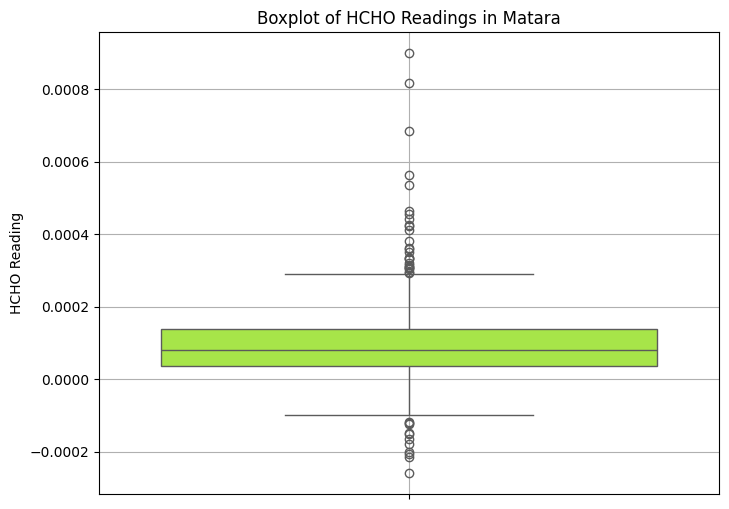

In [33]:
# drawing a box plot to see for outliers
plt.figure(figsize=(8,6))
sns.boxplot(data=matara_df, y='HCHO_Reading', color='greenyellow')
plt.title("Boxplot of HCHO Readings in Matara")
plt.ylabel("HCHO Reading")
plt.grid(True)
plt.show()

In [34]:
matara_df = negative_val_convertor(matara_df, 'HCHO_Reading') # converting negative to null values
matara_df

,HCHO_Reading,Location,Current_Date
0,NaN,Matara,2019-01-01
1,0.000006,Matara,2019-01-02
2,0.000236,Matara,2019-01-03
3,0.000064,Matara,2019-01-04
4,0.000053,Matara,2019-01-05
...,...,...,...
1821,0.000228,Matara,2023-12-27
1822,NaN,Matara,2023-12-28
1823,NaN,Matara,2023-12-29
1824,0.000116,Matara,2023-12-30


In [35]:
matara_df.isnull().sum() # checking for null values

HCHO_Reading    962
Location          0
Current_Date      0
dtype: int64

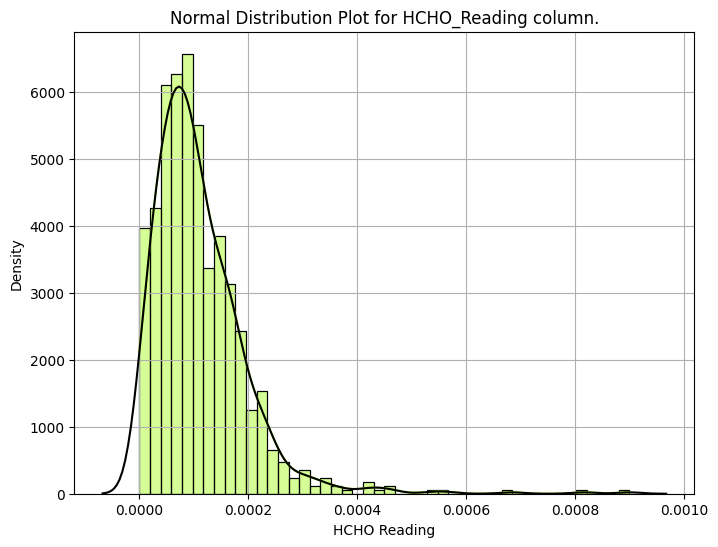

In [36]:
normal_distribution_plot(matara_df, 'HCHO_Reading', color='greenyellow') # plotting the normal distribution

In [37]:
matara_df = remove_outliers(matara_df, 'HCHO_Reading') # removing outliers from the dataframe
matara_df.reset_index(drop=True, inplace=True) # resetting the index of the dataframe
matara_df

,HCHO_Reading,Location,Current_Date
0,0.000006,Matara,2019-01-02
1,0.000236,Matara,2019-01-03
2,0.000064,Matara,2019-01-04
3,0.000053,Matara,2019-01-05
4,0.000132,Matara,2019-01-06
...,...,...,...
847,0.000063,Matara,2023-12-24
848,0.000072,Matara,2023-12-25
849,0.000059,Matara,2023-12-26
850,0.000228,Matara,2023-12-27


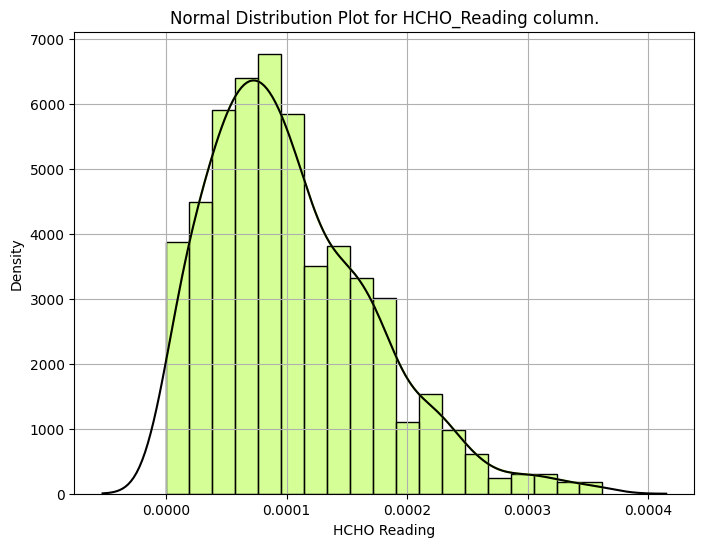

In [38]:
normal_distribution_plot(matara_df, 'HCHO_Reading', color='greenyellow') # plotting the normal distribution

In [39]:
matara_df = imputation(matara_df) # imputing the null values with the mean
matara_df

,HCHO_Reading,Location,Current_Date
0,0.000006,Matara,2019-01-02
1,0.000236,Matara,2019-01-03
2,0.000064,Matara,2019-01-04
3,0.000053,Matara,2019-01-05
4,0.000132,Matara,2019-01-06
...,...,...,...
847,0.000063,Matara,2023-12-24
848,0.000072,Matara,2023-12-25
849,0.000059,Matara,2023-12-26
850,0.000228,Matara,2023-12-27


In [40]:
matara_df.isnull().sum() # checking for null values

HCHO_Reading    0
Location        0
Current_Date    0
dtype: int64

In [41]:
matara_mean, matara_median, matara_mode, matara_std_dev = statistical_analysis('matara_df', 'HCHO_Reading') # statistical analysis of the HCHO readings
print("Statistical Analysis of HCHO Readings in Matara")
print(f"Mean Value: {matara_mean}")
print(f"Median Value: {matara_median}")
print(f"Mode Value: {matara_mode}")
print(f"Standard Deviation Value: {matara_std_dev}")

Statistical Analysis of HCHO Readings in Matara
Mean Value: 0.00010367630192819211
Median Value: 9.08040764275311e-05
Mode Value: 8.48560045610269e-08
Standard Deviation Value: 6.806631826412409e-05


In [42]:
# matara_df.to_csv("matara_df.csv", index=False)
if not os.path.exists(directory):
    os.makedirs(directory)

matara_df.to_csv('Cleaned Data/matara_df.csv', index=False)

##### Nuwara Eliya Data Frame

In [43]:
print("Nuwara Eliya Data Frame")
nuwara_eliya_df

Nuwara Eliya Data Frame


,HCHO_Reading,Location,Current_Date,Next_Date
0,NaN,Nuwara Eliya,2019-01-01,2019-01-02
1,NaN,Nuwara Eliya,2019-01-02,2019-01-03
2,0.000191,Nuwara Eliya,2019-01-03,2019-01-04
3,0.000051,Nuwara Eliya,2019-01-04,2019-01-05
4,0.000065,Nuwara Eliya,2019-01-05,2019-01-06
...,...,...,...,...
1821,NaN,Nuwara Eliya,2023-12-27,2023-12-28
1822,NaN,Nuwara Eliya,2023-12-28,2023-12-29
1823,NaN,Nuwara Eliya,2023-12-29,2023-12-30
1824,NaN,Nuwara Eliya,2023-12-30,2023-12-31


In [44]:
drop_next_date(nuwara_eliya_df)

In [45]:
nuwara_eliya_df.dtypes

HCHO_Reading           float64
Location                object
Current_Date    datetime64[ns]
dtype: object

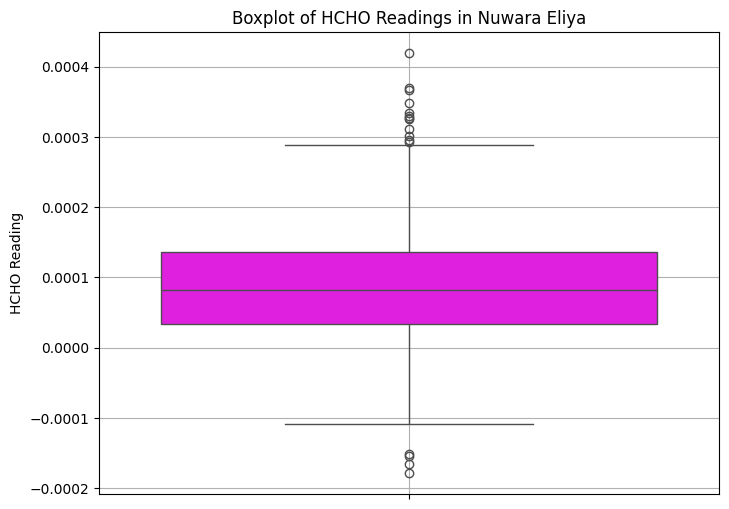

In [46]:
# drawing a box plot to see for outliers
plt.figure(figsize=(8,6))
sns.boxplot(data=nuwara_eliya_df, y='HCHO_Reading', color='fuchsia')
plt.title("Boxplot of HCHO Readings in Nuwara Eliya")
plt.ylabel("HCHO Reading")
plt.grid(True)
plt.show()

In [47]:
nuwara_eliya_df = negative_val_convertor(nuwara_eliya_df, 'HCHO_Reading') # converting negative to null values
nuwara_eliya_df

,HCHO_Reading,Location,Current_Date
0,NaN,Nuwara Eliya,2019-01-01
1,NaN,Nuwara Eliya,2019-01-02
2,0.000191,Nuwara Eliya,2019-01-03
3,0.000051,Nuwara Eliya,2019-01-04
4,0.000065,Nuwara Eliya,2019-01-05
...,...,...,...
1821,NaN,Nuwara Eliya,2023-12-27
1822,NaN,Nuwara Eliya,2023-12-28
1823,NaN,Nuwara Eliya,2023-12-29
1824,NaN,Nuwara Eliya,2023-12-30


In [48]:
nuwara_eliya_df.isnull().sum()

HCHO_Reading    1181
Location           0
Current_Date       0
dtype: int64

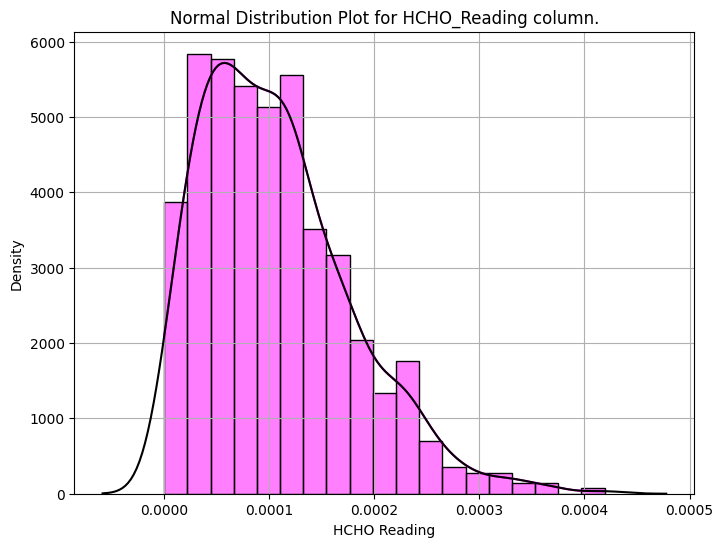

In [49]:
normal_distribution_plot(nuwara_eliya_df, 'HCHO_Reading', color='fuchsia') # plotting the normal distribution

In [50]:
nuwara_eliya_df = remove_outliers(nuwara_eliya_df, 'HCHO_Reading') # removing outliers from the dataframe
nuwara_eliya_df.reset_index(drop=True, inplace=True) # resetting the index of the dataframe
nuwara_eliya_df

,HCHO_Reading,Location,Current_Date
0,0.000191,Nuwara Eliya,2019-01-03
1,0.000051,Nuwara Eliya,2019-01-04
2,0.000065,Nuwara Eliya,2019-01-05
3,0.000090,Nuwara Eliya,2019-01-06
4,0.000041,Nuwara Eliya,2019-01-07
...,...,...,...
632,0.000041,Nuwara Eliya,2023-11-11
633,0.000036,Nuwara Eliya,2023-11-23
634,0.000108,Nuwara Eliya,2023-12-13
635,0.000006,Nuwara Eliya,2023-12-17


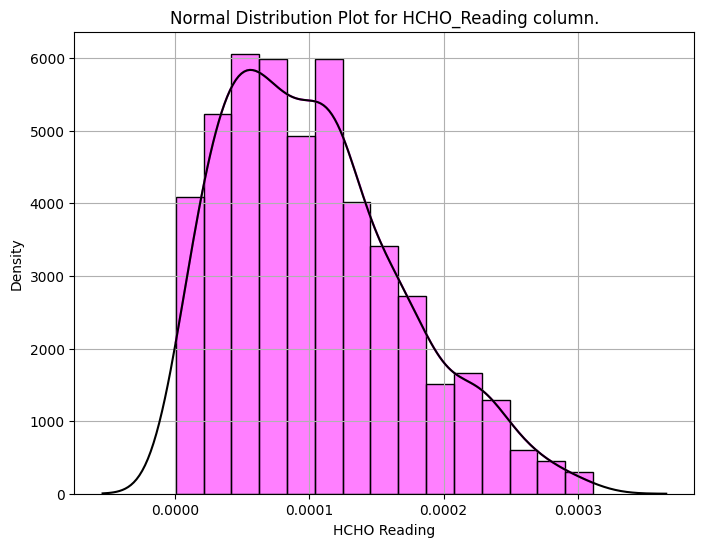

In [51]:
normal_distribution_plot(nuwara_eliya_df, 'HCHO_Reading', color='fuchsia') # plotting the normal distribution

In [52]:
nuwara_eliya_df = imputation(nuwara_eliya_df) # imputing the null values with the mean
nuwara_eliya_df

,HCHO_Reading,Location,Current_Date
0,0.000191,Nuwara Eliya,2019-01-03
1,0.000051,Nuwara Eliya,2019-01-04
2,0.000065,Nuwara Eliya,2019-01-05
3,0.000090,Nuwara Eliya,2019-01-06
4,0.000041,Nuwara Eliya,2019-01-07
...,...,...,...
632,0.000041,Nuwara Eliya,2023-11-11
633,0.000036,Nuwara Eliya,2023-11-23
634,0.000108,Nuwara Eliya,2023-12-13
635,0.000006,Nuwara Eliya,2023-12-17


In [53]:
nuwara_eliya_df.isnull().sum() # checking for null values

HCHO_Reading    0
Location        0
Current_Date    0
dtype: int64

In [54]:
nuwara_eliya_mean, nuwara_eliya_median, nuwara_eliya_mode, nuwara_eliya_std_dev = statistical_analysis('nuwara_eliya_df', 'HCHO_Reading') # statistical analysis of the HCHO readings
print("Statistical Analysis of HCHO Readings in Nuwara Eliya")
print(f"Mean Value: {nuwara_eliya_mean}")
print(f"Median Value: {nuwara_eliya_median}")
print(f"Mode Value: {nuwara_eliya_mode}")
print(f"Standard Deviation Value: {nuwara_eliya_std_dev}")

Statistical Analysis of HCHO Readings in Nuwara Eliya
Mean Value: 0.0001037491630817278
Median Value: 9.527971988931567e-05
Mode Value: 4.36330277496733e-07
Standard Deviation Value: 6.607535660146218e-05


In [55]:
# nuwara_eliya_df.to_csv("nuwara_eliya_df.csv", index=False)
if not os.path.exists(directory):
    os.makedirs(directory)

nuwara_eliya_df.to_csv('Cleaned Data/nuwara_eliya_df.csv', index=False)

#### Kandy Original Data Frame

In [56]:
kandy_df = pd.read_csv("Dataset/kan_output.csv", header=None)
kandy_df.columns = column_names # adding the column names to the dataframe
kandy_df

,HCHO_Reading,Location,Current_Date,Next_Date
0,0.000176,Kandy Proper,2019-01-01,2019-01-02
1,0.000092,Kandy Proper,2019-01-02,2019-01-03
2,NaN,Kandy Proper,2019-01-03,2019-01-04
3,0.000191,Kandy Proper,2019-01-04,2019-01-05
4,0.000122,Kandy Proper,2019-01-05,2019-01-06
...,...,...,...,...
1821,NaN,Kandy Proper,2023-12-27,2023-12-28
1822,NaN,Kandy Proper,2023-12-28,2023-12-29
1823,NaN,Kandy Proper,2023-12-29,2023-12-30
1824,0.000056,Kandy Proper,2023-12-30,2023-12-31


In [57]:
# converting the locations into a single word and make it uniform
kandy_df.loc[kandy_df['Location'] == "Kandy Proper", "Location"] = "Kandy"
kandy_df

,HCHO_Reading,Location,Current_Date,Next_Date
0,0.000176,Kandy,2019-01-01,2019-01-02
1,0.000092,Kandy,2019-01-02,2019-01-03
2,NaN,Kandy,2019-01-03,2019-01-04
3,0.000191,Kandy,2019-01-04,2019-01-05
4,0.000122,Kandy,2019-01-05,2019-01-06
...,...,...,...,...
1821,NaN,Kandy,2023-12-27,2023-12-28
1822,NaN,Kandy,2023-12-28,2023-12-29
1823,NaN,Kandy,2023-12-29,2023-12-30
1824,0.000056,Kandy,2023-12-30,2023-12-31


In [58]:
kandy_df.shape # checking the dimensions of the dataframe

(1826, 4)

In [59]:
drop_next_date(kandy_df)

In [60]:
kandy_df.dtypes # checking the datatypes of the dataframe

HCHO_Reading    float64
Location         object
Current_Date     object
dtype: object

In [61]:
# changing the data types of the date columns to datetime
kandy_df["Current_Date"] = pd.to_datetime(kandy_df["Current_Date"])
kandy_df.dtypes

HCHO_Reading           float64
Location                object
Current_Date    datetime64[ns]
dtype: object

##### Kandy Data Frame

In [62]:
print("Kandy Data Frame")
kandy_df

Kandy Data Frame


,HCHO_Reading,Location,Current_Date
0,0.000176,Kandy,2019-01-01
1,0.000092,Kandy,2019-01-02
2,NaN,Kandy,2019-01-03
3,0.000191,Kandy,2019-01-04
4,0.000122,Kandy,2019-01-05
...,...,...,...
1821,NaN,Kandy,2023-12-27
1822,NaN,Kandy,2023-12-28
1823,NaN,Kandy,2023-12-29
1824,0.000056,Kandy,2023-12-30


In [63]:
kandy_df.dtypes

HCHO_Reading           float64
Location                object
Current_Date    datetime64[ns]
dtype: object

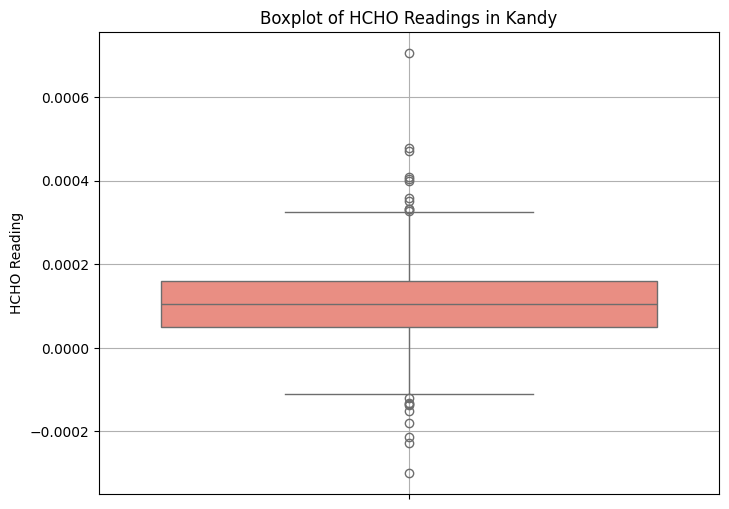

In [64]:
# drawing a box plot to see for outliers
plt.figure(figsize=(8,6))
sns.boxplot(data=kandy_df, y='HCHO_Reading', color='salmon')
plt.title("Boxplot of HCHO Readings in Kandy")
plt.ylabel("HCHO Reading")
plt.grid(True)
plt.show()

In [65]:
kandy_df = negative_val_convertor(kandy_df, 'HCHO_Reading') # converting negative to null values
kandy_df

,HCHO_Reading,Location,Current_Date
0,0.000176,Kandy,2019-01-01
1,0.000092,Kandy,2019-01-02
2,NaN,Kandy,2019-01-03
3,0.000191,Kandy,2019-01-04
4,0.000122,Kandy,2019-01-05
...,...,...,...
1821,NaN,Kandy,2023-12-27
1822,NaN,Kandy,2023-12-28
1823,NaN,Kandy,2023-12-29
1824,0.000056,Kandy,2023-12-30


In [66]:
kandy_df.isnull().sum() # checking for null values

HCHO_Reading    901
Location          0
Current_Date      0
dtype: int64

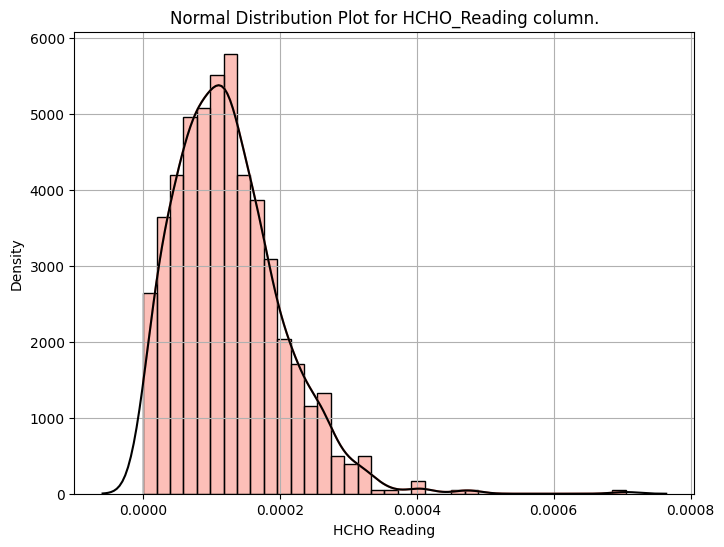

In [67]:
normal_distribution_plot(kandy_df, 'HCHO_Reading', color='salmon') # plotting the normal distribution

In [68]:
kandy_df = remove_outliers(kandy_df, 'HCHO_Reading') # removing outliers from the dataframe
kandy_df.reset_index(drop=True, inplace=True) # resetting the index of the dataframe
kandy_df

,HCHO_Reading,Location,Current_Date
0,0.000176,Kandy,2019-01-01
1,0.000092,Kandy,2019-01-02
2,0.000191,Kandy,2019-01-04
3,0.000122,Kandy,2019-01-05
4,0.000163,Kandy,2019-01-07
...,...,...,...
913,0.000116,Kandy,2023-12-07
914,0.000261,Kandy,2023-12-11
915,0.000114,Kandy,2023-12-21
916,0.000116,Kandy,2023-12-23


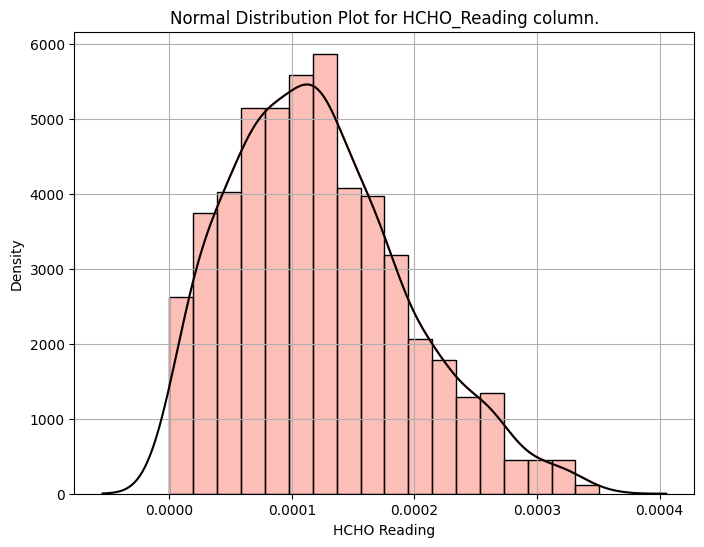

In [69]:
normal_distribution_plot(kandy_df, 'HCHO_Reading', color='salmon') # plotting the normal distribution

In [70]:
kandy_df = imputation(kandy_df) # imputing the null values with the mean
kandy_df

,HCHO_Reading,Location,Current_Date
0,0.000176,Kandy,2019-01-01
1,0.000092,Kandy,2019-01-02
2,0.000191,Kandy,2019-01-04
3,0.000122,Kandy,2019-01-05
4,0.000163,Kandy,2019-01-07
...,...,...,...
913,0.000116,Kandy,2023-12-07
914,0.000261,Kandy,2023-12-11
915,0.000114,Kandy,2023-12-21
916,0.000116,Kandy,2023-12-23


In [71]:
kandy_df.isnull().sum() # checking for null values

HCHO_Reading    0
Location        0
Current_Date    0
dtype: int64

In [72]:
kandy_mean, kandy_median, kandy_mode, kandy_std_dev = statistical_analysis('kandy_df', 'HCHO_Reading') # statistical analysis of the HCHO readings
print("Statistical Analysis of HCHO Readings in Kandy")
print(f"Mean Value: {kandy_mean}")
print(f"Median Value: {kandy_median}")
print(f"Mode Value: {kandy_mode}")
print(f"Standard Deviation Value: {kandy_std_dev}")

Statistical Analysis of HCHO Readings in Kandy
Mean Value: 0.00012201022314764176
Median Value: 0.00011426544932259999
Mode Value: 1.569671117488859e-07
Standard Deviation Value: 7.117573168516854e-05


In [73]:
# kandy_df.to_csv("kandy_df.csv", index=False)
if not os.path.exists(directory):
    os.makedirs(directory)

kandy_df.to_csv('Cleaned Data/kandy_df.csv', index=False)

#### Monaragala Kurunegala Jaffna Data Frame

In [74]:
mon_kur_jaf_df = pd.read_csv("Dataset/mon_kur_jaf_output.csv", header=None)
mon_kur_jaf_df.columns = column_names # adding the column names to the dataframe
mon_kur_jaf_df

,HCHO_Reading,Location,Current_Date,Next_Date
0,NaN,"Bibile, Monaragala",2019-01-01,2019-01-02
1,0.000019,"Bibile, Monaragala",2019-01-02,2019-01-03
2,0.000028,"Bibile, Monaragala",2019-01-03,2019-01-04
3,0.000037,"Bibile, Monaragala",2019-01-04,2019-01-05
4,-0.000018,"Bibile, Monaragala",2019-01-05,2019-01-06
...,...,...,...,...
5473,NaN,Jaffna Proper,2023-12-27,2023-12-28
5474,0.000051,Jaffna Proper,2023-12-28,2023-12-29
5475,0.000127,Jaffna Proper,2023-12-29,2023-12-30
5476,0.000117,Jaffna Proper,2023-12-30,2023-12-31


In [75]:
# converting the locations into a single word and make it uniform
mon_kur_jaf_df.loc[mon_kur_jaf_df['Location'] == "Bibile, Monaragala", "Location"] = "Monaragala"
mon_kur_jaf_df.loc[mon_kur_jaf_df['Location'] == "Kurunegala Proper", "Location"] = "Kurunegala"
mon_kur_jaf_df.loc[mon_kur_jaf_df['Location'] == "Jaffna Proper", "Location"] = "Jaffna"
mon_kur_jaf_df

,HCHO_Reading,Location,Current_Date,Next_Date
0,NaN,Monaragala,2019-01-01,2019-01-02
1,0.000019,Monaragala,2019-01-02,2019-01-03
2,0.000028,Monaragala,2019-01-03,2019-01-04
3,0.000037,Monaragala,2019-01-04,2019-01-05
4,-0.000018,Monaragala,2019-01-05,2019-01-06
...,...,...,...,...
5473,NaN,Jaffna,2023-12-27,2023-12-28
5474,0.000051,Jaffna,2023-12-28,2023-12-29
5475,0.000127,Jaffna,2023-12-29,2023-12-30
5476,0.000117,Jaffna,2023-12-30,2023-12-31


In [76]:
mon_kur_jaf_df.shape # checking the dimensions of the dataframe

(5478, 4)

In [77]:
mon_kur_jaf_df.dtypes # checking the datatypes of the dataframe

HCHO_Reading    float64
Location         object
Current_Date     object
Next_Date        object
dtype: object

In [78]:
# changing the data types of the date columns to datetime
mon_kur_jaf_df["Current_Date"] = pd.to_datetime(mon_kur_jaf_df["Current_Date"])
mon_kur_jaf_df["Next_Date"]  = pd.to_datetime(mon_kur_jaf_df["Next_Date"])
mon_kur_jaf_df.dtypes

HCHO_Reading           float64
Location                object
Current_Date    datetime64[ns]
Next_Date       datetime64[ns]
dtype: object

In [79]:
monaragala_df = mon_kur_jaf_df[mon_kur_jaf_df['Location'] == 'Monaragala']
kurunegala_df = mon_kur_jaf_df[mon_kur_jaf_df['Location'] == 'Kurunegala']
jaffna_df = mon_kur_jaf_df[mon_kur_jaf_df['Location'] == 'Jaffna']

# resetting the indexes of the dataframes
kurunegala_df.reset_index(drop=True, inplace=True) 
jaffna_df.reset_index(drop=True, inplace=True)

##### Monaragala Data Frame

In [80]:
print("Monaragala Data Frame")
monaragala_df

Monaragala Data Frame


,HCHO_Reading,Location,Current_Date,Next_Date
0,NaN,Monaragala,2019-01-01,2019-01-02
1,0.000019,Monaragala,2019-01-02,2019-01-03
2,0.000028,Monaragala,2019-01-03,2019-01-04
3,0.000037,Monaragala,2019-01-04,2019-01-05
4,-0.000018,Monaragala,2019-01-05,2019-01-06
...,...,...,...,...
1821,NaN,Monaragala,2023-12-27,2023-12-28
1822,NaN,Monaragala,2023-12-28,2023-12-29
1823,NaN,Monaragala,2023-12-29,2023-12-30
1824,NaN,Monaragala,2023-12-30,2023-12-31


In [81]:
drop_next_date(monaragala_df)

In [82]:
monaragala_df.dtypes

HCHO_Reading           float64
Location                object
Current_Date    datetime64[ns]
dtype: object

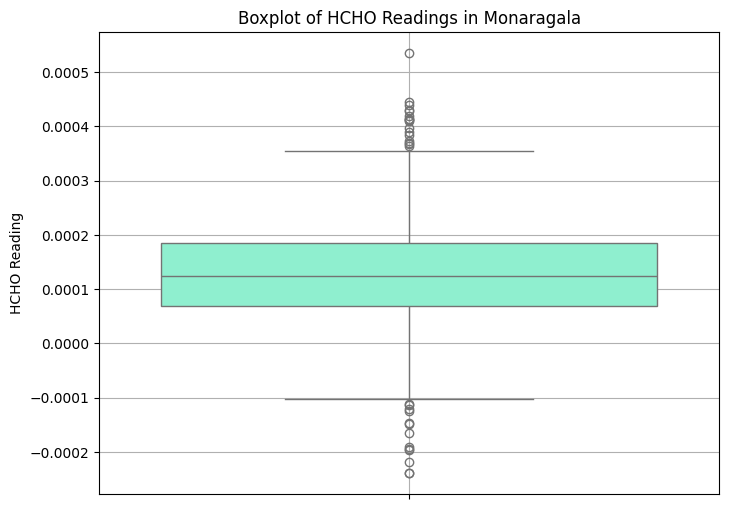

In [83]:
# drawing a box plot to see for outliers
plt.figure(figsize=(8,6))
sns.boxplot(data=monaragala_df, y='HCHO_Reading', color='aquamarine')
plt.title("Boxplot of HCHO Readings in Monaragala")
plt.ylabel("HCHO Reading")
plt.grid(True)
plt.show()

In [84]:
monaragala_df = negative_val_convertor(monaragala_df, 'HCHO_Reading') # converting negative to null values
monaragala_df

,HCHO_Reading,Location,Current_Date
0,NaN,Monaragala,2019-01-01
1,0.000019,Monaragala,2019-01-02
2,0.000028,Monaragala,2019-01-03
3,0.000037,Monaragala,2019-01-04
4,NaN,Monaragala,2019-01-05
...,...,...,...
1821,NaN,Monaragala,2023-12-27
1822,NaN,Monaragala,2023-12-28
1823,NaN,Monaragala,2023-12-29
1824,NaN,Monaragala,2023-12-30


In [85]:
monaragala_df.isnull().sum() # checking for null values

HCHO_Reading    774
Location          0
Current_Date      0
dtype: int64

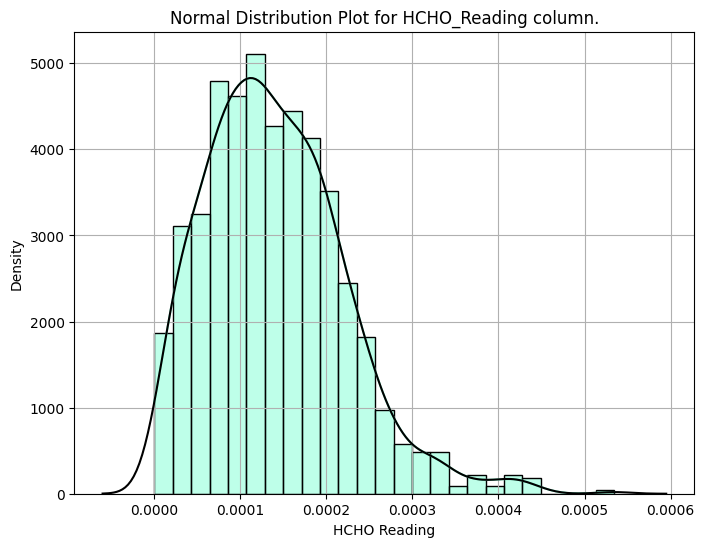

In [86]:
normal_distribution_plot(monaragala_df, 'HCHO_Reading', color='aquamarine') # plotting the normal distribution

In [87]:
monaragala_df = remove_outliers(monaragala_df, 'HCHO_Reading') # removing outliers from the dataframe
monaragala_df.reset_index(drop=True, inplace=True) # resetting the index of the dataframe
monaragala_df

,HCHO_Reading,Location,Current_Date
0,0.000019,Monaragala,2019-01-02
1,0.000028,Monaragala,2019-01-03
2,0.000037,Monaragala,2019-01-04
3,0.000146,Monaragala,2019-01-06
4,0.000028,Monaragala,2019-01-07
...,...,...,...
1034,0.000140,Monaragala,2023-12-11
1035,0.000188,Monaragala,2023-12-14
1036,0.000052,Monaragala,2023-12-18
1037,0.000149,Monaragala,2023-12-23


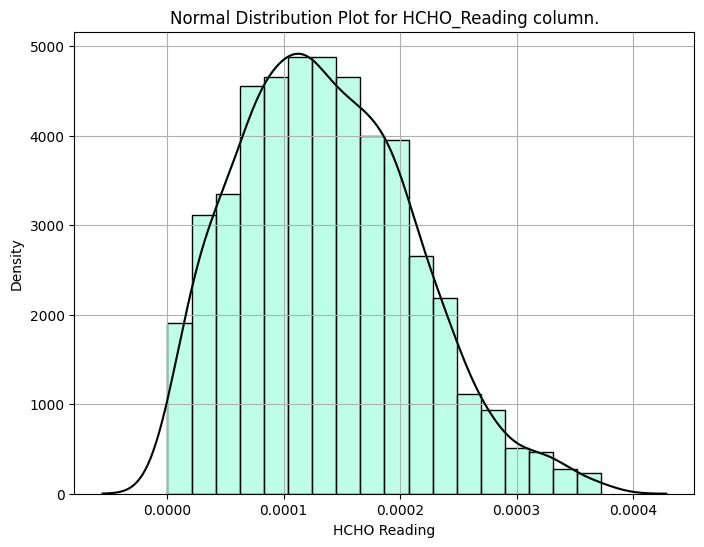

In [88]:
normal_distribution_plot(monaragala_df, 'HCHO_Reading', color='aquamarine') # plotting the normal distribution

In [89]:
monaragala_df = imputation(monaragala_df) # imputing the null values with the mean
monaragala_df

,HCHO_Reading,Location,Current_Date
0,0.000019,Monaragala,2019-01-02
1,0.000028,Monaragala,2019-01-03
2,0.000037,Monaragala,2019-01-04
3,0.000146,Monaragala,2019-01-06
4,0.000028,Monaragala,2019-01-07
...,...,...,...
1034,0.000140,Monaragala,2023-12-11
1035,0.000188,Monaragala,2023-12-14
1036,0.000052,Monaragala,2023-12-18
1037,0.000149,Monaragala,2023-12-23


In [90]:
monaragala_df.isnull().sum() # checking for null values

HCHO_Reading    0
Location        0
Current_Date    0
dtype: int64

In [91]:
monaragala_mean, monaragala_median, monaragala_mode, monaragala_std_dev = statistical_analysis('monaragala_df', 'HCHO_Reading') # statistical analysis of the HCHO readings
print("Statistical Analysis of HCHO Readings in Monaragala")
print(f"Mean Value: {monaragala_mean}")
print(f"Median Value: {monaragala_median}")
print(f"Mode Value: {monaragala_mode}")
print(f"Standard Deviation Value: {monaragala_std_dev}")

Statistical Analysis of HCHO Readings in Monaragala
Mean Value: 0.0001367559451127927
Median Value: 0.000129308743732
Mode Value: 1.4612316831653266e-07
Standard Deviation Value: 7.440759809094741e-05


In [92]:
# monaragala_df.to_csv("monaragala_df.csv", index=False)
if not os.path.exists(directory):
    os.makedirs(directory)

monaragala_df.to_csv('Cleaned Data/monaragala_df.csv', index=False)

##### Kurunegala Data Frame

In [93]:
print("Kurnegala Data Frame")
kurunegala_df

Kurnegala Data Frame


,HCHO_Reading,Location,Current_Date,Next_Date
0,0.000088,Kurunegala,2019-01-01,2019-01-02
1,0.000137,Kurunegala,2019-01-02,2019-01-03
2,0.000148,Kurunegala,2019-01-03,2019-01-04
3,-0.000002,Kurunegala,2019-01-04,2019-01-05
4,0.000249,Kurunegala,2019-01-05,2019-01-06
...,...,...,...,...
1821,0.000075,Kurunegala,2023-12-27,2023-12-28
1822,NaN,Kurunegala,2023-12-28,2023-12-29
1823,NaN,Kurunegala,2023-12-29,2023-12-30
1824,0.000158,Kurunegala,2023-12-30,2023-12-31


In [94]:
drop_next_date(kurunegala_df)

In [95]:
kurunegala_df.dtypes

HCHO_Reading           float64
Location                object
Current_Date    datetime64[ns]
dtype: object

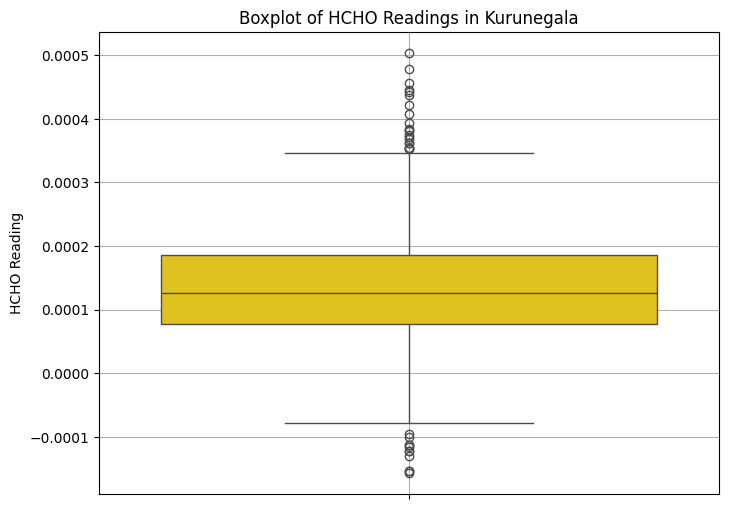

In [96]:
# drawing a box plot to see for outliers
plt.figure(figsize=(8,6))
sns.boxplot(data=kurunegala_df, y='HCHO_Reading', color='gold')
plt.title("Boxplot of HCHO Readings in Kurunegala")
plt.ylabel("HCHO Reading")
plt.grid(True)
plt.show()

In [97]:
kurunegala_df = negative_val_convertor(kurunegala_df, 'HCHO_Reading') # converting negative to null values
kurunegala_df

,HCHO_Reading,Location,Current_Date
0,0.000088,Kurunegala,2019-01-01
1,0.000137,Kurunegala,2019-01-02
2,0.000148,Kurunegala,2019-01-03
3,NaN,Kurunegala,2019-01-04
4,0.000249,Kurunegala,2019-01-05
...,...,...,...
1821,0.000075,Kurunegala,2023-12-27
1822,NaN,Kurunegala,2023-12-28
1823,NaN,Kurunegala,2023-12-29
1824,0.000158,Kurunegala,2023-12-30


In [98]:
kurunegala_df.isnull().sum() # checking for null values

HCHO_Reading    648
Location          0
Current_Date      0
dtype: int64

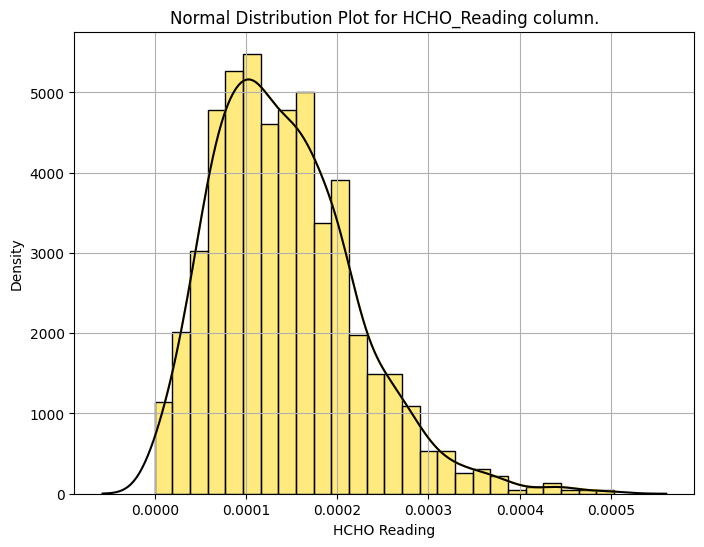

In [99]:
normal_distribution_plot(kurunegala_df, 'HCHO_Reading', color='gold') # plotting the normal distribution

In [100]:
kurunegala_df = remove_outliers(kurunegala_df, 'HCHO_Reading') # removing outliers from the dataframe
kurunegala_df.reset_index(drop=True, inplace=True) # resetting the index of the dataframe
kurunegala_df

,HCHO_Reading,Location,Current_Date
0,0.000088,Kurunegala,2019-01-01
1,0.000137,Kurunegala,2019-01-02
2,0.000148,Kurunegala,2019-01-03
3,0.000249,Kurunegala,2019-01-05
4,0.000102,Kurunegala,2019-01-06
...,...,...,...
1161,0.000063,Kurunegala,2023-12-23
1162,0.000094,Kurunegala,2023-12-25
1163,0.000152,Kurunegala,2023-12-26
1164,0.000075,Kurunegala,2023-12-27


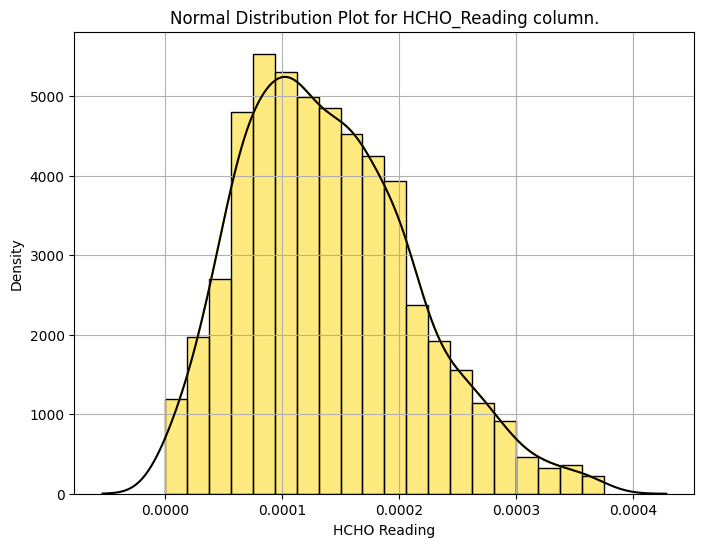

In [101]:
normal_distribution_plot(kurunegala_df, 'HCHO_Reading', color='gold') # plotting the normal distribution

In [102]:
kurunegala_df = imputation(kurunegala_df) # imputing the null values with the mean
kurunegala_df

,HCHO_Reading,Location,Current_Date
0,0.000088,Kurunegala,2019-01-01
1,0.000137,Kurunegala,2019-01-02
2,0.000148,Kurunegala,2019-01-03
3,0.000249,Kurunegala,2019-01-05
4,0.000102,Kurunegala,2019-01-06
...,...,...,...
1161,0.000063,Kurunegala,2023-12-23
1162,0.000094,Kurunegala,2023-12-25
1163,0.000152,Kurunegala,2023-12-26
1164,0.000075,Kurunegala,2023-12-27


In [103]:
kurunegala_df.isnull().sum() # checking for null values

HCHO_Reading    0
Location        0
Current_Date    0
dtype: int64

In [104]:
kurunegala_mean, kurunegala_median, kurunegala_mode, kurunegala_std_dev = statistical_analysis('kurunegala_df', 'HCHO_Reading') # statistical analysis of the HCHO readings
print("Statistical Analysis of HCHO Readings in Kurunegala")
print(f"Mean Value: {kurunegala_mean}")
print(f"Median Value: {kurunegala_median}")
print(f"Mode Value: {kurunegala_mode}")
print(f"Standard Deviation Value: {kurunegala_std_dev}")

Statistical Analysis of HCHO Readings in Kurunegala
Mean Value: 0.00013968606709372416
Median Value: 0.0001325175118745
Mode Value: 1.4333763162876774e-07
Standard Deviation Value: 7.326576074631087e-05


In [105]:
# kurunegala_df.to_csv("kurunegala_df.csv", index=False)
if not os.path.exists(directory):
    os.makedirs(directory)

kurunegala_df.to_csv('Cleaned Data/kurunegala_df.csv', index=False)

##### Jaffna Data Frame

In [106]:
print("Jaffna Data Frame")
jaffna_df

Jaffna Data Frame


,HCHO_Reading,Location,Current_Date,Next_Date
0,0.000058,Jaffna,2019-01-01,2019-01-02
1,0.000102,Jaffna,2019-01-02,2019-01-03
2,0.000039,Jaffna,2019-01-03,2019-01-04
3,-0.000002,Jaffna,2019-01-04,2019-01-05
4,0.000159,Jaffna,2019-01-05,2019-01-06
...,...,...,...,...
1821,NaN,Jaffna,2023-12-27,2023-12-28
1822,0.000051,Jaffna,2023-12-28,2023-12-29
1823,0.000127,Jaffna,2023-12-29,2023-12-30
1824,0.000117,Jaffna,2023-12-30,2023-12-31


In [107]:
drop_next_date(jaffna_df)

In [108]:
jaffna_df.dtypes # checking the datatypes of the dataframe

HCHO_Reading           float64
Location                object
Current_Date    datetime64[ns]
dtype: object

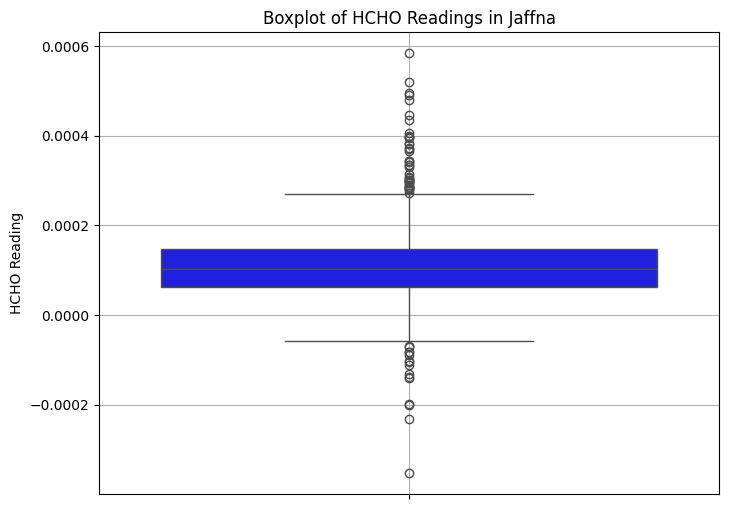

In [109]:
# drawing a box plot to see for outliers
plt.figure(figsize=(8,6))
sns.boxplot(data=jaffna_df, y='HCHO_Reading', color='blue')
plt.title("Boxplot of HCHO Readings in Jaffna")
plt.ylabel("HCHO Reading")
plt.grid(True)
plt.show()

In [110]:
jaffna_df = negative_val_convertor(jaffna_df, 'HCHO_Reading') # converting negative to null values
jaffna_df

,HCHO_Reading,Location,Current_Date
0,0.000058,Jaffna,2019-01-01
1,0.000102,Jaffna,2019-01-02
2,0.000039,Jaffna,2019-01-03
3,NaN,Jaffna,2019-01-04
4,0.000159,Jaffna,2019-01-05
...,...,...,...
1821,NaN,Jaffna,2023-12-27
1822,0.000051,Jaffna,2023-12-28
1823,0.000127,Jaffna,2023-12-29
1824,0.000117,Jaffna,2023-12-30


In [111]:
jaffna_df.isnull().sum() # checking for null values

HCHO_Reading    422
Location          0
Current_Date      0
dtype: int64

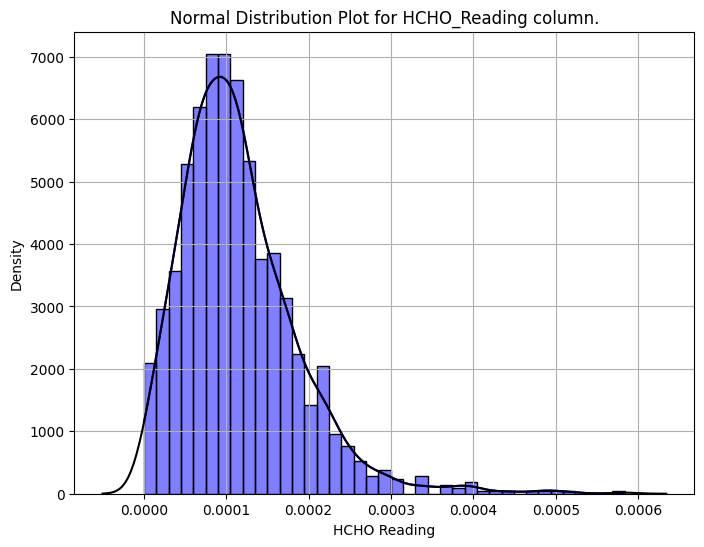

In [112]:
normal_distribution_plot(jaffna_df, 'HCHO_Reading', color='blue') # plotting the normal distribution

In [113]:
jaffna_df = remove_outliers(jaffna_df, 'HCHO_Reading') # removing outliers from the dataframe
jaffna_df.reset_index(drop=True, inplace=True) # resetting the index of the dataframe
jaffna_df

,HCHO_Reading,Location,Current_Date
0,0.000058,Jaffna,2019-01-01
1,0.000102,Jaffna,2019-01-02
2,0.000039,Jaffna,2019-01-03
3,0.000159,Jaffna,2019-01-05
4,0.000075,Jaffna,2019-01-06
...,...,...,...
1376,0.000088,Jaffna,2023-12-24
1377,0.000051,Jaffna,2023-12-28
1378,0.000127,Jaffna,2023-12-29
1379,0.000117,Jaffna,2023-12-30


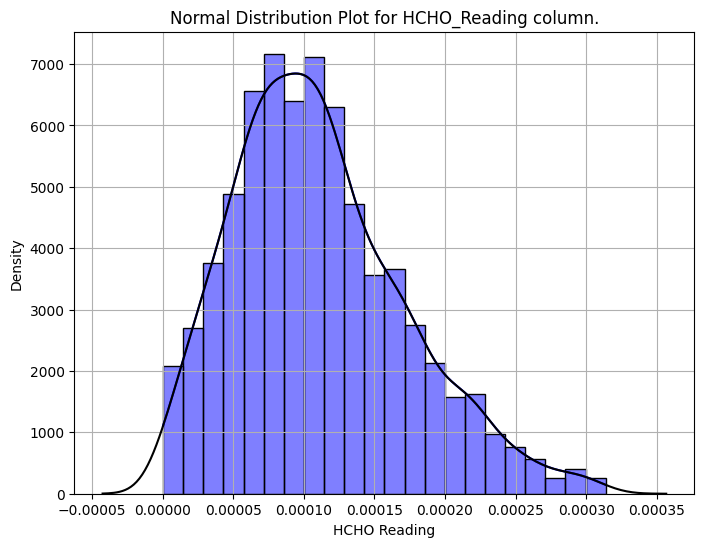

In [114]:
normal_distribution_plot(jaffna_df, 'HCHO_Reading', color='blue') # plotting the normal distribution

In [115]:
jaffna_df = imputation(jaffna_df) # imputing the null values with the mean
jaffna_df

,HCHO_Reading,Location,Current_Date
0,0.000058,Jaffna,2019-01-01
1,0.000102,Jaffna,2019-01-02
2,0.000039,Jaffna,2019-01-03
3,0.000159,Jaffna,2019-01-05
4,0.000075,Jaffna,2019-01-06
...,...,...,...
1376,0.000088,Jaffna,2023-12-24
1377,0.000051,Jaffna,2023-12-28
1378,0.000127,Jaffna,2023-12-29
1379,0.000117,Jaffna,2023-12-30


In [116]:
jaffna_df.isnull().sum()

HCHO_Reading    0
Location        0
Current_Date    0
dtype: int64

In [117]:
jaffna_mean, jaffna_median, jaffna_mode, jaffna_std_dev = statistical_analysis('jaffna_df', 'HCHO_Reading') # statistical analysis of the HCHO readings
print("Statistical Analysis of HCHO Readings in Jaffna")
print(f"Mean Value: {jaffna_mean}")
print(f"Median Value: {jaffna_median}")
print(f"Mode Value: {jaffna_mode}")
print(f"Standard Deviation Value: {jaffna_std_dev}")

Statistical Analysis of HCHO Readings in Jaffna
Mean Value: 0.000110588005374901
Median Value: 0.0001030325171612
Mode Value: 4.10346731297695e-07
Standard Deviation Value: 6.0713737567834214e-05


In [118]:
# jaffna_df.to_csv("jaffna_df.csv", index=False)
if not os.path.exists(directory):
    os.makedirs(directory)

jaffna_df.to_csv('Cleaned Data/jaffna_df.csv', index=False)

### Merging the Data Frames.

Let us merge the three data frames into one combined data frame.

In [119]:
dfs = []
folder_path = "Cleaned Data"
file_names = ['colombo_df.csv', 'matara_df.csv', 'nuwara_eliya_df.csv', 'kandy_df.csv', 'monaragala_df.csv', 'kurunegala_df.csv', 'jaffna_df.csv']

for file in file_names:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)
    dfs.append(df)

combined_df = pd.concat(dfs, ignore_index=True)
combined_df.reset_index(drop=True, inplace=True)

combined_df.to_csv("combined_df.csv", index=False)
combined_df

,HCHO_Reading,Location,Current_Date
0,0.000197,Colombo,2019-01-01
1,0.000263,Colombo,2019-01-02
2,0.000099,Colombo,2019-01-03
3,0.000210,Colombo,2019-01-04
4,0.000179,Colombo,2019-01-05
...,...,...,...
7268,0.000088,Jaffna,2023-12-24
7269,0.000051,Jaffna,2023-12-28
7270,0.000127,Jaffna,2023-12-29
7271,0.000117,Jaffna,2023-12-30


In [120]:
combined_df.dtypes

HCHO_Reading    float64
Location         object
Current_Date     object
dtype: object

In [121]:
# changing the data types of the date columns to datetime
combined_df["Current_Date"] = pd.to_datetime(combined_df["Current_Date"])
combined_df.dtypes

HCHO_Reading           float64
Location                object
Current_Date    datetime64[ns]
dtype: object

In [122]:
from tabulate import tabulate
locations = ["Colombo","Matara","Nuwara Eliya","Monaragala","Kurunegala","Jaffna","Kandy"] # storing all the locations in a list

grouped_statistics = combined_df.groupby('Location')['HCHO_Reading'].describe() # grouping by the location and getting statistical analysis

rounded_grouped_statistics = grouped_statistics.round(6) # rounding off the values to 6 decimal places
print(rounded_grouped_statistics.to_string())

               count      mean       std  min       25%       50%       75%       max
Location                                                                             
Colombo       1280.0  0.000165  0.000088  0.0  0.000100  0.000155  0.000222  0.000440
Jaffna        1381.0  0.000111  0.000061  0.0  0.000067  0.000103  0.000146  0.000314
Kandy          918.0  0.000122  0.000071  0.0  0.000069  0.000114  0.000165  0.000351
Kurunegala    1166.0  0.000140  0.000073  0.0  0.000085  0.000133  0.000187  0.000375
Matara         852.0  0.000104  0.000068  0.0  0.000053  0.000091  0.000145  0.000362
Monaragala    1039.0  0.000137  0.000074  0.0  0.000080  0.000129  0.000188  0.000373
Nuwara Eliya   637.0  0.000104  0.000066  0.0  0.000051  0.000095  0.000144  0.000311


In [123]:
# viewing as a table
print(tabulate(rounded_grouped_statistics, headers='keys', tablefmt='psql')) # the table is printed in psql format

+--------------+---------+----------+---------+-------+---------+----------+----------+----------+
| Location     |   count |     mean |     std |   min |     25% |      50% |      75% |      max |
|--------------+---------+----------+---------+-------+---------+----------+----------+----------|
| Colombo      |    1280 | 0.000165 | 8.8e-05 |     0 | 0.0001  | 0.000155 | 0.000222 | 0.00044  |
| Jaffna       |    1381 | 0.000111 | 6.1e-05 |     0 | 6.7e-05 | 0.000103 | 0.000146 | 0.000314 |
| Kandy        |     918 | 0.000122 | 7.1e-05 |     0 | 6.9e-05 | 0.000114 | 0.000165 | 0.000351 |
| Kurunegala   |    1166 | 0.00014  | 7.3e-05 |     0 | 8.5e-05 | 0.000133 | 0.000187 | 0.000375 |
| Matara       |     852 | 0.000104 | 6.8e-05 |     0 | 5.3e-05 | 9.1e-05  | 0.000145 | 0.000362 |
| Monaragala   |    1039 | 0.000137 | 7.4e-05 |     0 | 8e-05   | 0.000129 | 0.000188 | 0.000373 |
| Nuwara Eliya |     637 | 0.000104 | 6.6e-05 |     0 | 5.1e-05 | 9.5e-05  | 0.000144 | 0.000311 |
+---------

In [124]:
# calculating statistical measures for the whole dataset
combined_mean, combined_median, combined_mode, combined_std_dev = statistical_analysis('combined_df', 'HCHO_Reading') # statistical analysis of the HCHO readings
print("Statistical Analysis of HCHO Readings in the Combined Dataset")
print(f"Mean Value: {combined_mean}")
print(f"Median Value: {combined_median}")
print(f"Mode Value: {combined_mode}")
print(f"Standard Deviation Value: {combined_std_dev}")

Statistical Analysis of HCHO Readings in the Combined Dataset
Mean Value: 0.00012857930117107997
Median Value: 0.000118202084601
Mode Value: 8.48560045610269e-08
Standard Deviation Value: 7.573872281058032e-05


## Visualization of Data

Let us try to analyze the HCHO reading variation based on the location using a barplot.

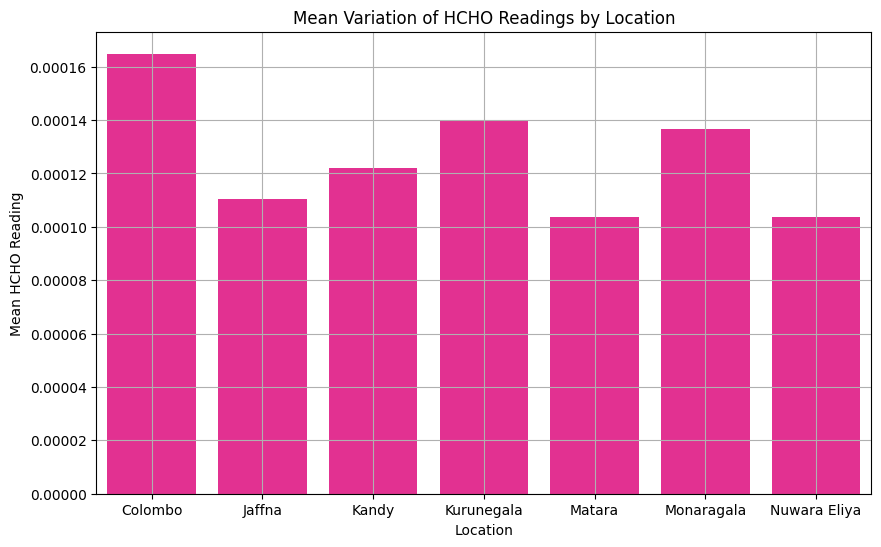

In [125]:
# plt.figure(figsize=(10, 6))
# sns.barplot(data=combined_df, x='Location', y='HCHO_Reading', color='hotpink')
# plt.title("Variation of HCHO readings with location")
# plt.xlabel("Location")
# plt.ylabel("HCHO Reading")
# plt.show()

mean_hcho_by_location = combined_df.groupby('Location')['HCHO_Reading'].mean().reset_index() # calculating the mean HCHO readings by location
plt.figure(figsize=(10, 6))
sns.barplot(data=mean_hcho_by_location, x='Location', y='HCHO_Reading', color='deeppink')
plt.title("Mean Variation of HCHO Readings by Location")
plt.xlabel("Location")
plt.ylabel("Mean HCHO Reading")
plt.grid(True)
plt.show()

Let us analyze the spread of the HCHO readings for the whole dataset based on the location.

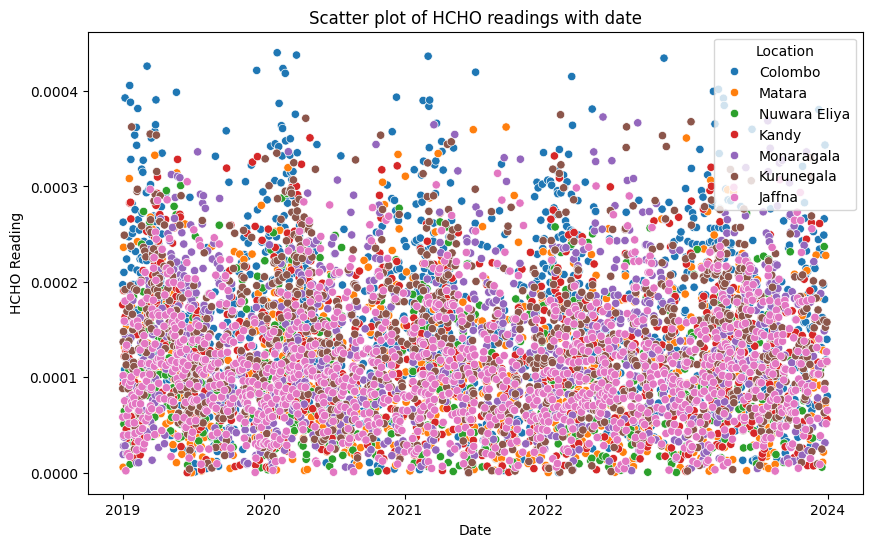

In [126]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=combined_df, x="Current_Date", y="HCHO_Reading", hue="Location")
plt.title("Scatter plot of HCHO readings with date")
plt.xlabel("Date")
plt.ylabel("HCHO Reading")
plt.show()

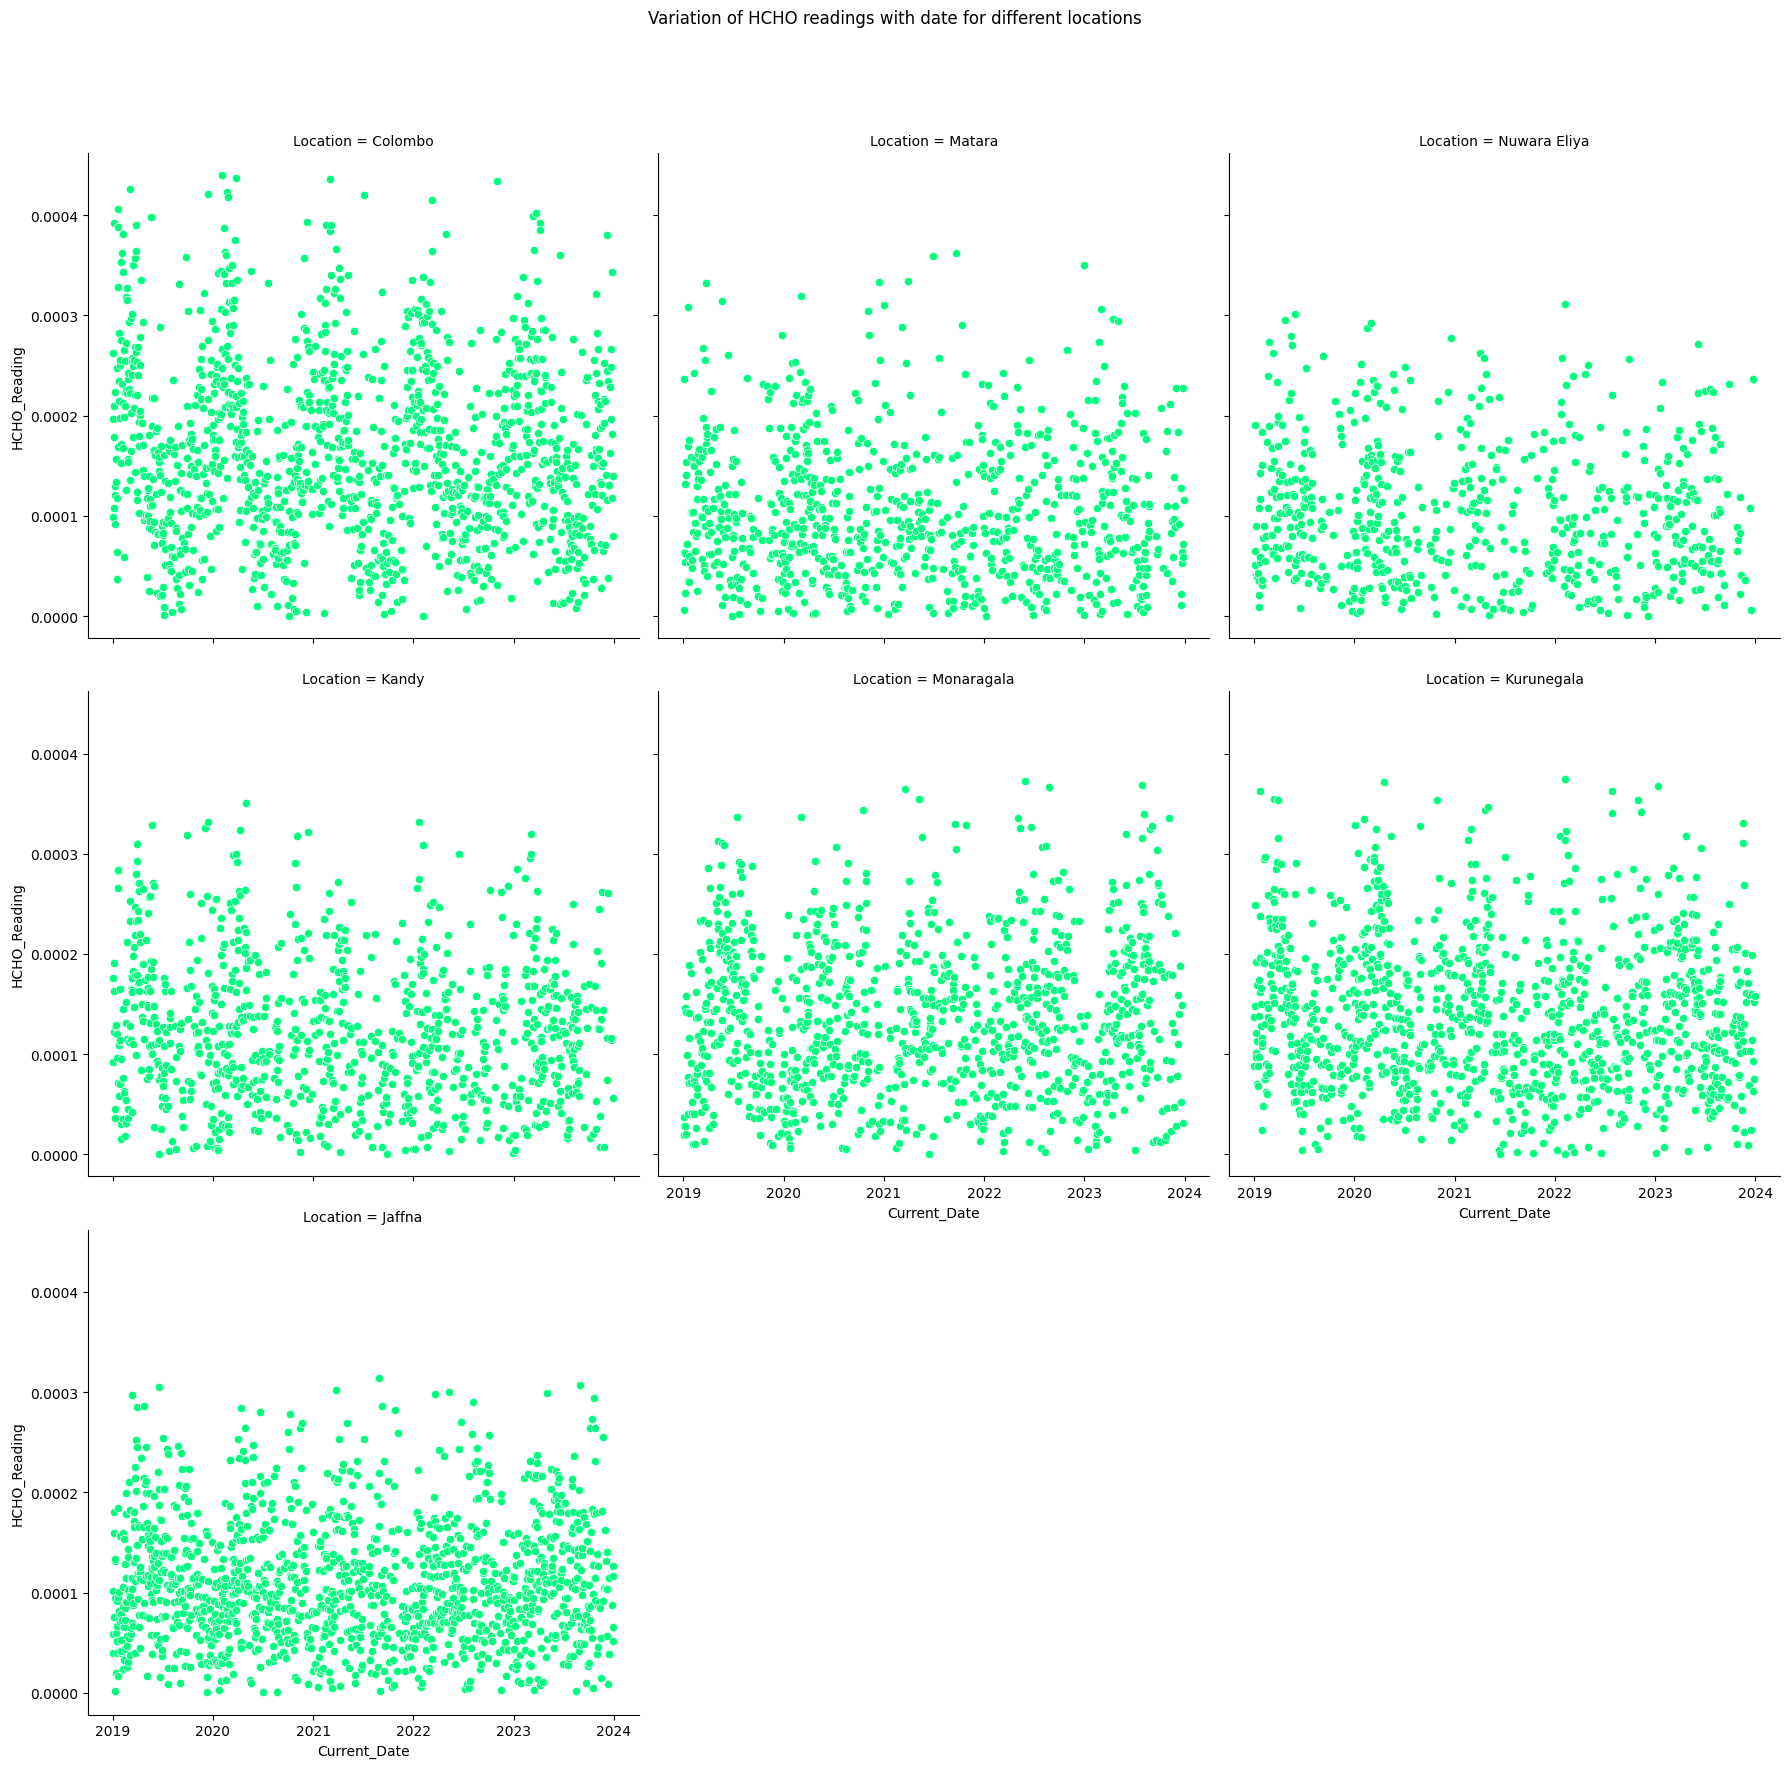

In [127]:
# let us draw the scatterplot for each location separately
graph = sns.FacetGrid(combined_df, col='Location', col_wrap=3, height=6)
graph.map(sns.scatterplot, "Current_Date", "HCHO_Reading", color="springgreen")
plt.subplots_adjust(top=0.9)
graph.figure.suptitle("Variation of HCHO readings with date for different locations")
plt.show()

In [128]:
def plot_hcho_vs_date(dataframe):
    dataframe['Current_Date'] = pd.to_datetime(dataframe['Current_Date'])
    dataframe['Year'] = dataframe['Current_Date'].dt.year
    yearly_mean = dataframe.groupby('Year')['HCHO_Reading'].mean()

    plt.figure(figsize=(10, 6))
    plt.plot(yearly_mean.index, yearly_mean.values, marker='o', linestyle='-', color='darkorange')
    plt.title("Mean HCHO Readings vs Year")
    plt.xlabel("Year")
    plt.ylabel("Mean HCHO Reading")
    plt.grid(True)
    plt.show()

Colombo


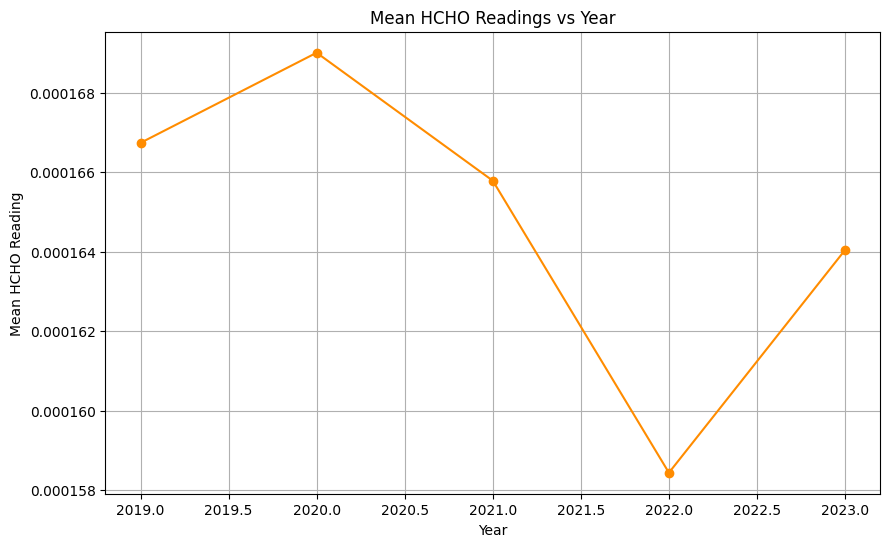

Matara


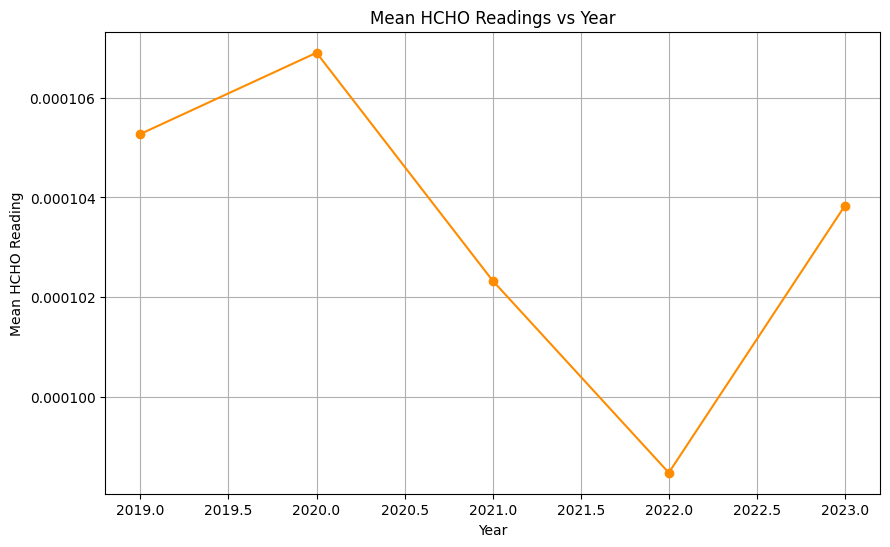

Nuwara Eliya


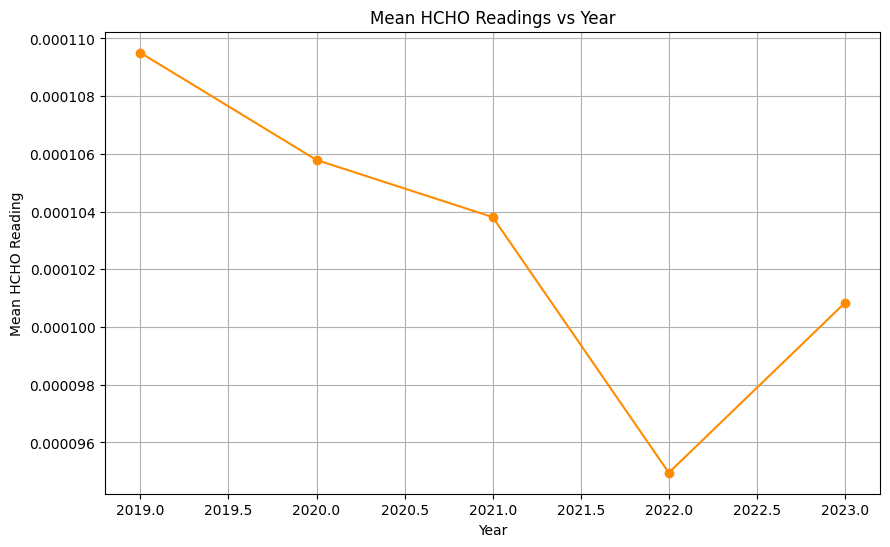

Kandy


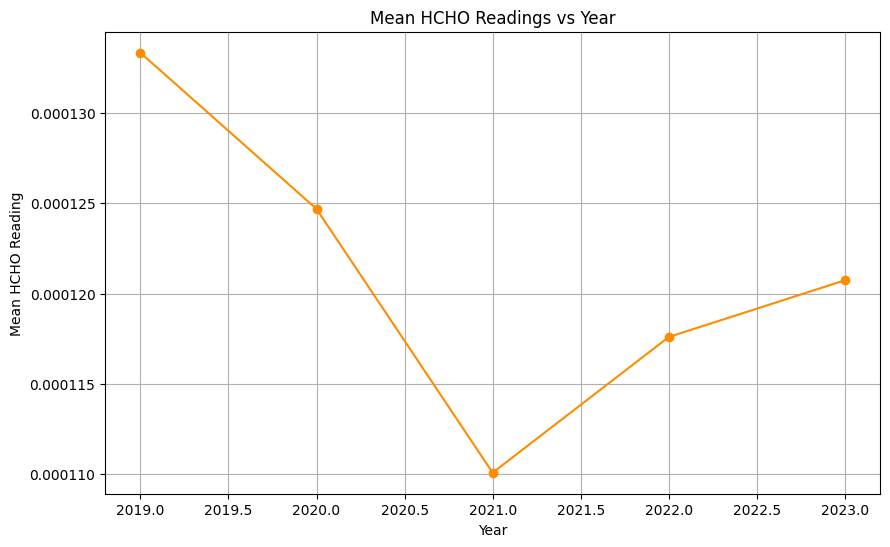

Monaragala


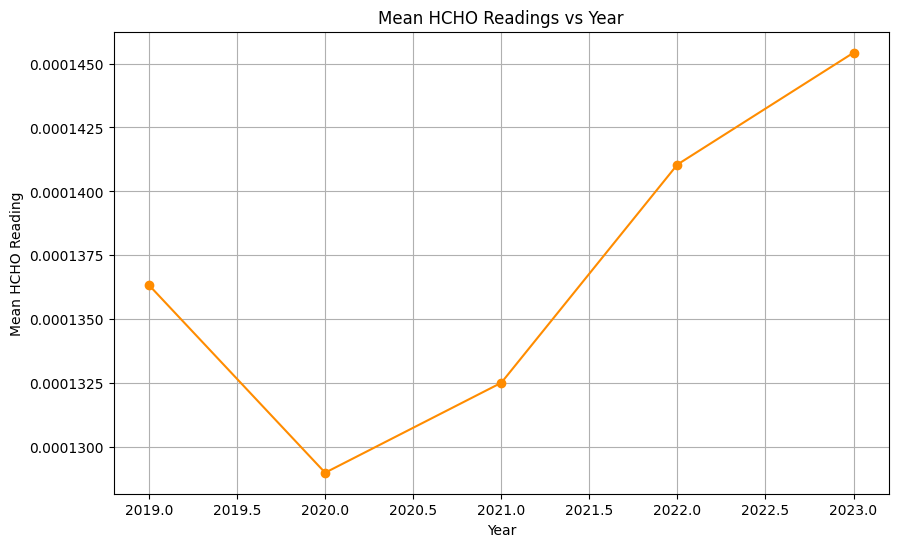

Kurunegala


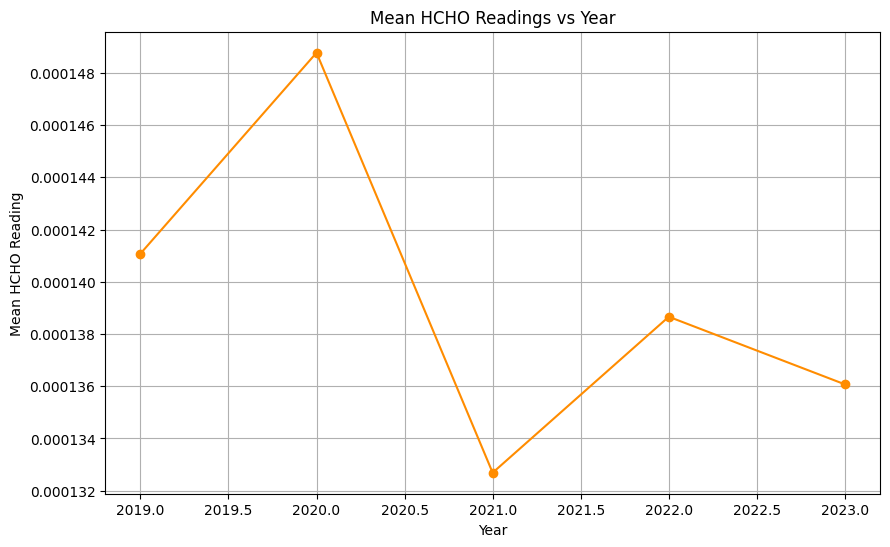

Jaffna


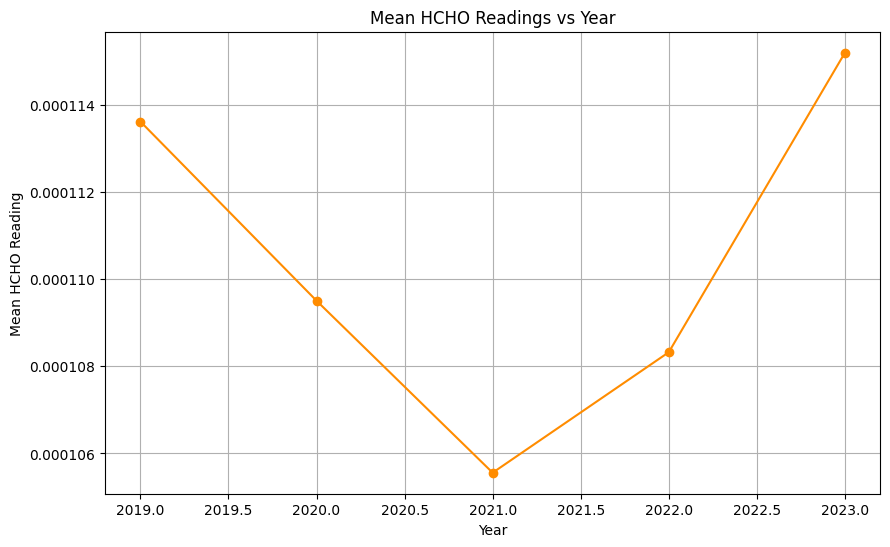

In [129]:
print("Colombo")
plot_hcho_vs_date(colombo_df)
print("Matara")
plot_hcho_vs_date(matara_df)
print("Nuwara Eliya")
plot_hcho_vs_date(nuwara_eliya_df)
print("Kandy")
plot_hcho_vs_date(kandy_df)
print("Monaragala")
plot_hcho_vs_date(monaragala_df)
print("Kurunegala")
plot_hcho_vs_date(kurunegala_df)
print("Jaffna")
plot_hcho_vs_date(jaffna_df)

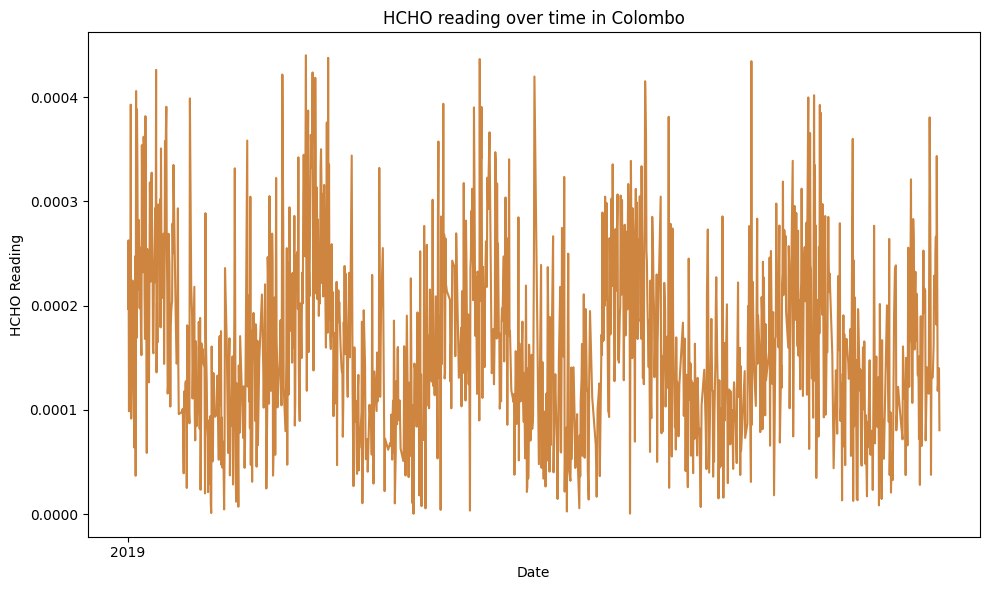

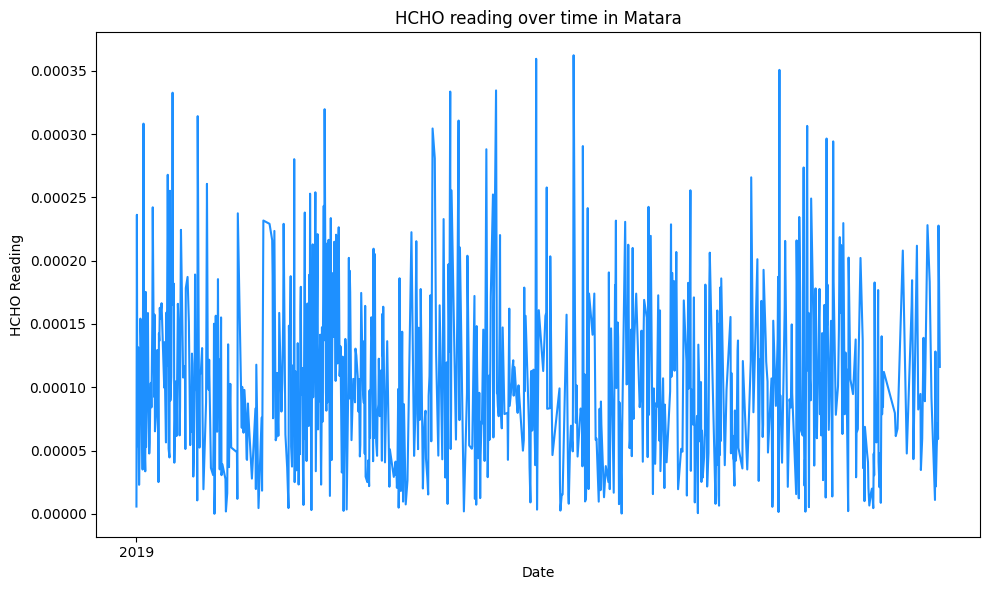

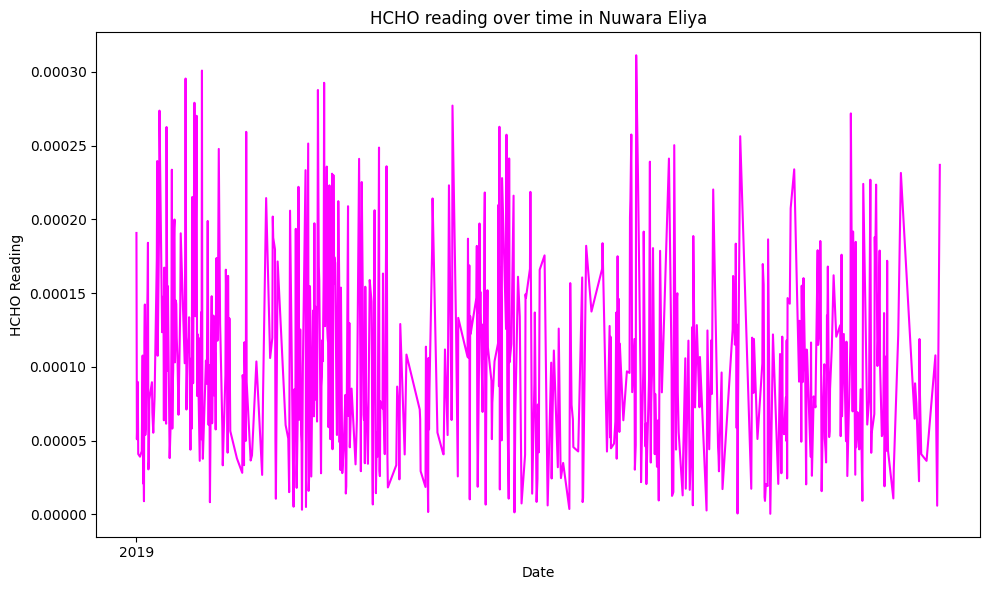

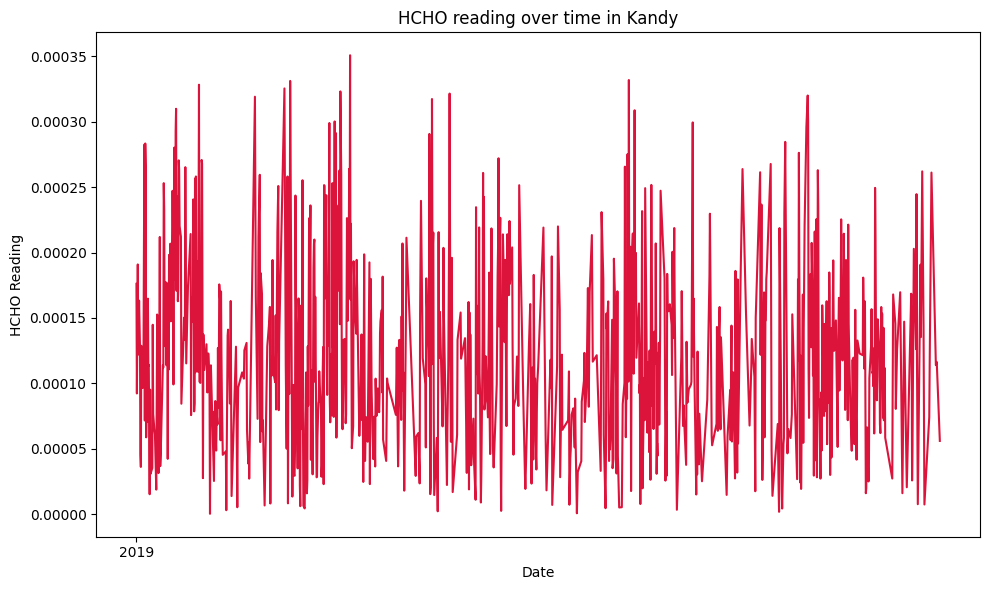

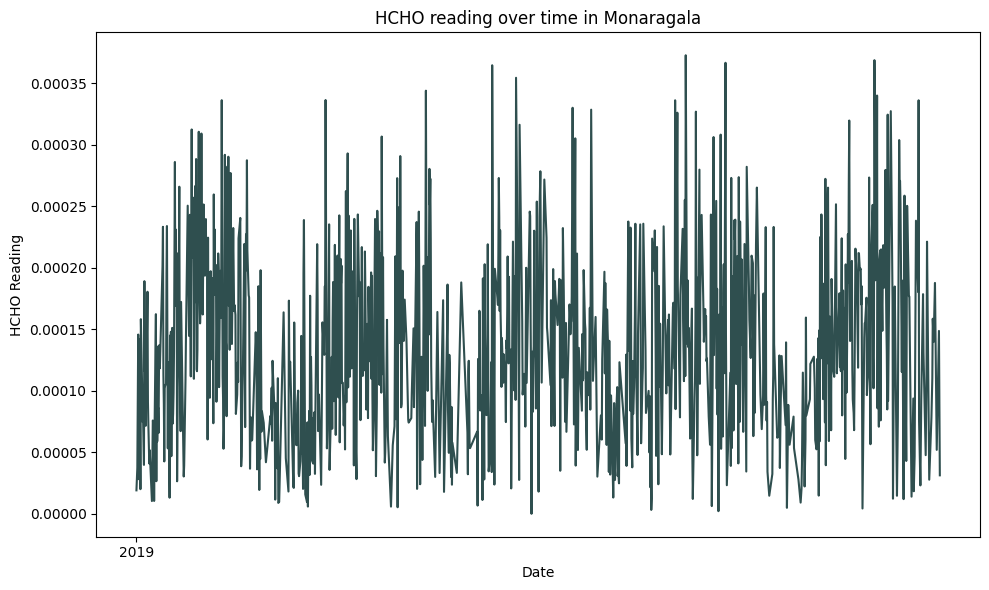

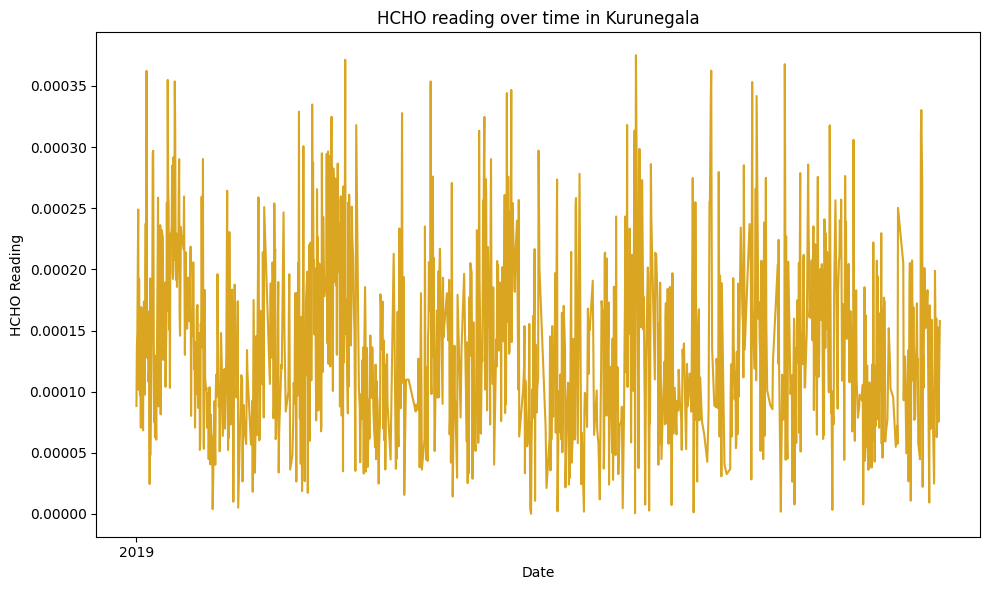

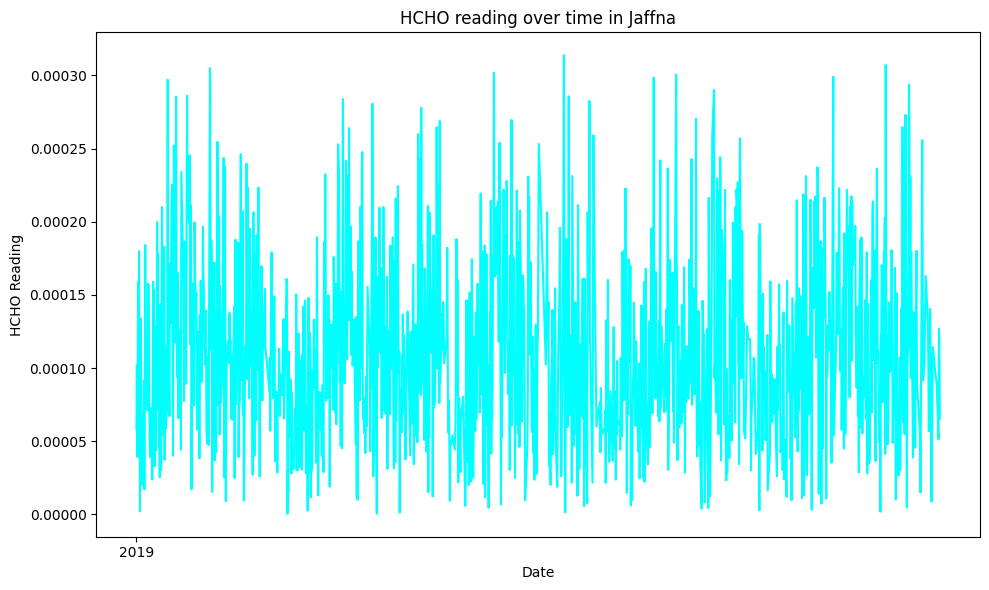

In [130]:
locations = combined_df['Location'].unique() # getting the unique locations
colors = ['peru', 'dodgerblue', 'magenta', 'crimson', 'darkslategrey', 'goldenrod', 'cyan']

for i,location in enumerate(locations):
    group = combined_df[combined_df['Location'] == location]
    plt.figure(figsize=(10,6))
    plt.plot(group['Current_Date'], group['HCHO_Reading'], color=colors[i % len(colors)])

    plt.xlabel('Date')
    plt.ylabel('HCHO Reading')
    plt.title(f"HCHO reading over time in {location}")

    plt.xticks(ticks=[group['Current_Date'].iloc[0]], labels=[group['Current_Date'].iloc[0].strftime('%Y')])
    plt.tight_layout()
    plt.show()

# unique_years = pd.DatetimeIndex(combined_df['Current_Date']).year.unique() # getting the unique years
# unique_locations = combined_df['Location'].unique() # getting the unique locations

# for year in unique_years:
#     for location in unique_locations:
#         year_location_data = combined_df[(combined_df['Current_Date'].dt.year == year) & (combined_df['Location'] == location)]

#         if year_location_data.empty:
#             continue
            
#         plt.figure(figsize=(10,6))
#         plt.plot(year_location_data['Current_Date'], year_location_data['HCHO_Reading'])

#         plt.xlabel('Date')
#         plt.ylabel('HCHO Reading')
#         plt.title(f"HCHO reading over time in {location} for the year {year}")